# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### TRAN-NGOC Linh - __[Linh.Tran-Ngoc@ulb.be](mailto:Linh.Tran-Ngoc@ulb.be) - Student ID 459764__

### Video presentation: www.youtube.com/abcd1234

# Pump it Up: Data Mining the Water Table


_This notebook was executed in less than 30 minutes on a Mac Book Pro. Please note that some computations are purpusely made shorter for the demo and do not always reflect the optimal presented results. The code to obtain the optimal results will always be available and can be run, but with sometimes very long execution times._

# Introduction

The goal of this project is to predict the operating condition of waterpoints in Tanzania, based on a dataset containing several information about each waterpoint. In a first part, data preprocessing will be applied to the dataset in order to have more usable data for our models. Next, several different models will be tested and compared. Finally, an alternative model will be built based on the results of the second part. 

### Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [1]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

The dataset on which we will have to establish predictions for the DrivenData is also loaded.

In [2]:
eval_data <- read.csv("test_set_values.csv",stringsAsFactors = T)

### Libraries

In [142]:
install.packages("dummies")
install.packages("factoextra")
install.packages("performanceEstimation")
install.packages("nnet")
install.packages("randomForest")
install.packages("RSNNS")
install.packages("png")
install.packages("e1071")
install.packages("xgboost")


The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpFy9XNy/downloaded_packages

The downloaded binary packages 

In [143]:
library(dummies)
library(factoextra)
library(performanceEstimation)
library(nnet)
library(randomForest)
library(RSNNS)
library(png)
library(e1071)
require(xgboost)

### Basic data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

The X dataset contains 59400 samples with 40 different features, of which 30 are categorical and 10 are numerical.

In [5]:
options(repr.matrix.max.cols=100)
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55656   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [6]:
categorical_variables <- which(sapply(X[1,],class)=="factor")
numerical_variables <- which(sapply(X[1,],class)=="numeric" | sapply(X[1,],class)=="integer")
noquote(paste("Number of categorical features :",length(categorical_variables)))
noquote(paste("Number of numerical features :",length(numerical_variables)))

[1] Number of categorical features : 30

[1] Number of numerical features : 10

The target variable is a categorical variable with 3 different levels, indicating if the water pump is functional, functional but needs repair or non functional.

In [7]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55656                                  
 Max.   :74247                                  

This histogram shows the number of samples corresponding to each class of the target variable. Notice that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category *functional needs repair*, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

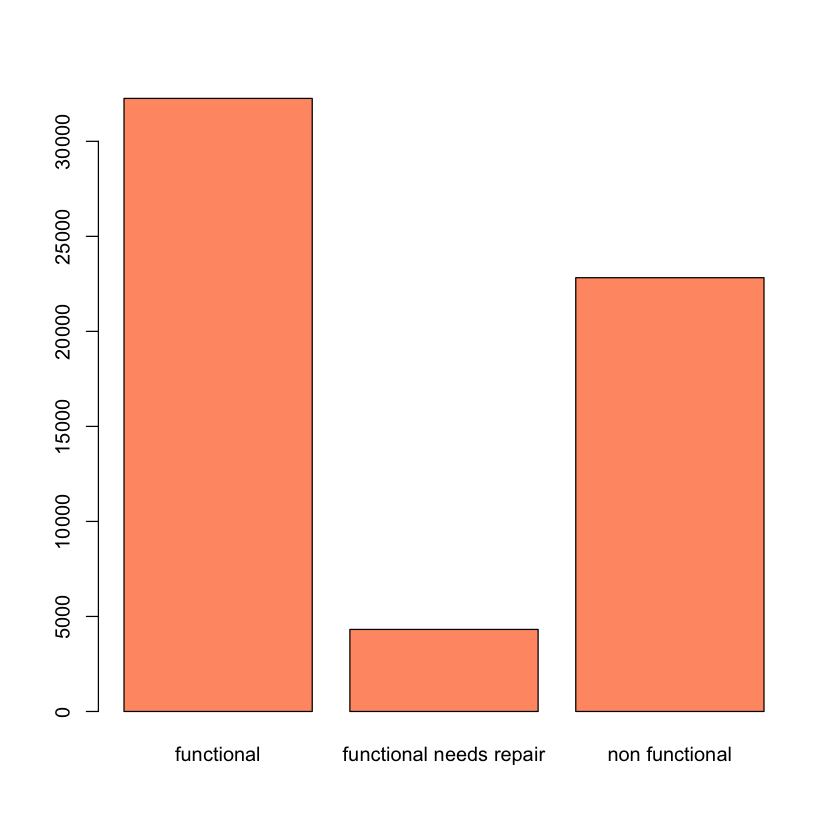

In [8]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y$status_group),col="#ff9973")

# 1. Data preprocessing

## 1.1. Missing value imputation


### 1.1.1. Categorical variables

We check if there are any NA values in the dataset. The results show that no NA values are present in either dataset.

In [9]:
noquote(paste("Number of NA values in X :",sum(is.na(X))))
noquote(paste("Number of NA values in Y :",sum(is.na(Y))))

[1] Number of NA values in X : 0

[1] Number of NA values in Y : 0

It is however important to note that this result does not look for empty strings or *none* strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were some empty strings, for example for features *funder*, *installer*, *subvillage*, *scheme_management*,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

Note that the *demo_data* variable will be used to illustrate some of the preprocessing functions.

In [10]:
data <- merge(X,Y)
dim(data)
demo_data <- data

[1] 59400    41

We start by representing the number of missing values for each categorical variable (and the percentage it corresponds to in regard to the total number of samples). The missing values will be treated in several different ways :
- removing features containing too many missing values
- removing the samples with the missing values
- considering the missing values as a category on their own
- keeping only the relevant classes of the problematic features through one hot encoding (for example discard the column resulting from the none class in the one hot encoding but keeping the rest)

In [11]:
empty_count <- c()
for (c in colnames(demo_data[,categorical_variables])) { 
    a <- dim(demo_data[demo_data[,c] == "none" | demo_data[,c] == "" | demo_data[,c] == "None",])[1]
    empty_count <- c(empty_count,a)
}

df <- data.frame(variable=colnames(demo_data[,categorical_variables]),empty_count=empty_count,percentage=round(100*empty_count/nrow(demo_data),digits=2))
df[df$empty_count != 0,]

,variable,empty_count,percentage
,<chr>,<int>,<dbl>
2,funder,3637,6.12
3,installer,3655,6.15
4,wpt_name,3565,6.00
6,subvillage,371,0.62
10,public_meeting,3334,5.61
12,scheme_management,3878,6.53
13,scheme_name,28835,48.54
14,permit,3056,5.14


It stands out that the feature *scheme_name* has more than 48% of missing values. We first analyze if any of the other classes of this feature could be interesting to keep (if there are any dominant classes that affect a large number of samples that might bring some information). A barplot displays the 5 most common classes of this feature and shows the number of corresponding samples. We see that the other classes really represent extremely small amounts of samples (less than 1000), and that the missing values are too present to consider this feature as informative, it is therefore removed from the dataset.

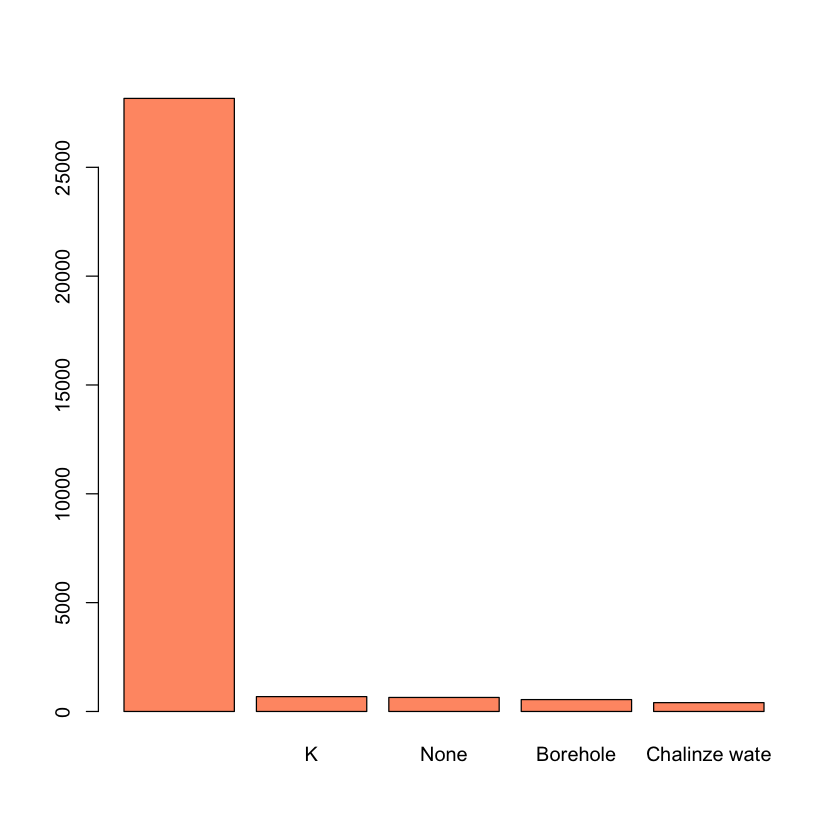

In [12]:
barplot((sort(table(demo_data$scheme_name), decreasing=TRUE)[1:5]),col = "#ff9973")

In [13]:
remove_scheme_name <- function(df) {
    return(subset(df,select=-c(scheme_name)))
}

In [14]:
demo_data <- remove_scheme_name(demo_data)

The rest of the categorical features containing a lot of missing values will be treated throughout the preprocessing, using the various methods that were listed previously.

### 1.1.2 Numerical variables

Concerning the numerical variables, it is sometimes tricky to know whether 0s correspond to missing values or not. For the *longitude* and *latitude* features, we can plot the data graphically :

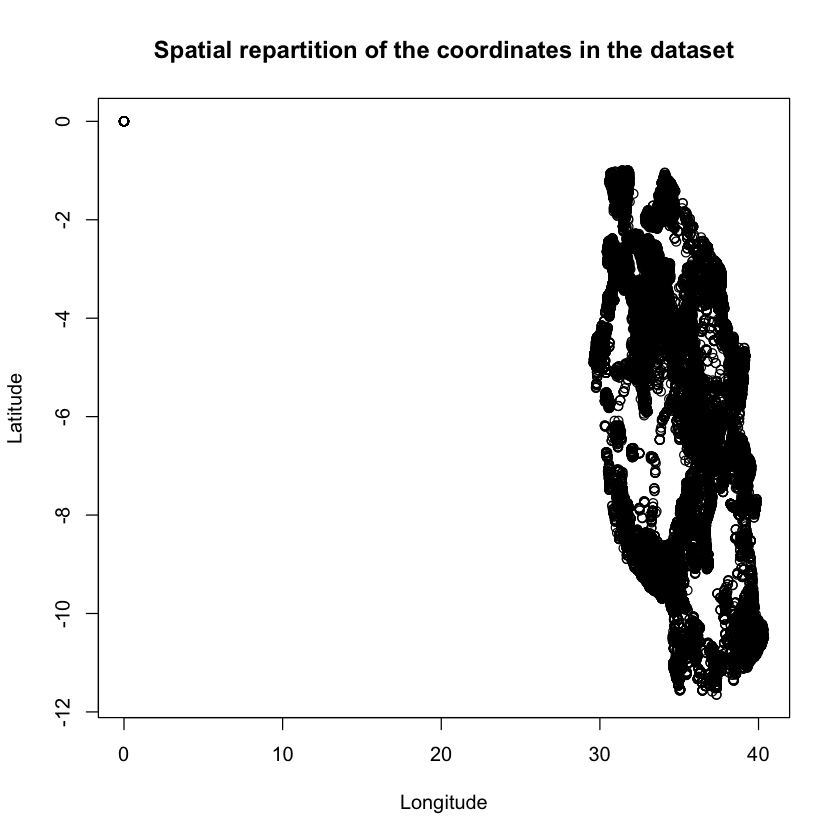

In [15]:
plot(demo_data$longitude,demo_data$latitude,xlab = "Longitude",ylab="Latitude",main="Spatial repartition of the coordinates in the dataset")

We see some outliers that have coordinates (0,0), which represent missing values. We will therefore replace them by the mean values of the coordinates.

In [16]:
discard_unrealistic_coordinates <- function(df) {
    df$longitude[df$longitude < 20] <- mean(df$longitude)
    df$latitude[df$longitude < 20] <- mean(df$latitude)
    return(df)
}

In [17]:
demo_data <- discard_unrealistic_coordinates(demo_data)

By plotting the results after this preprocessing, we obtain the following :

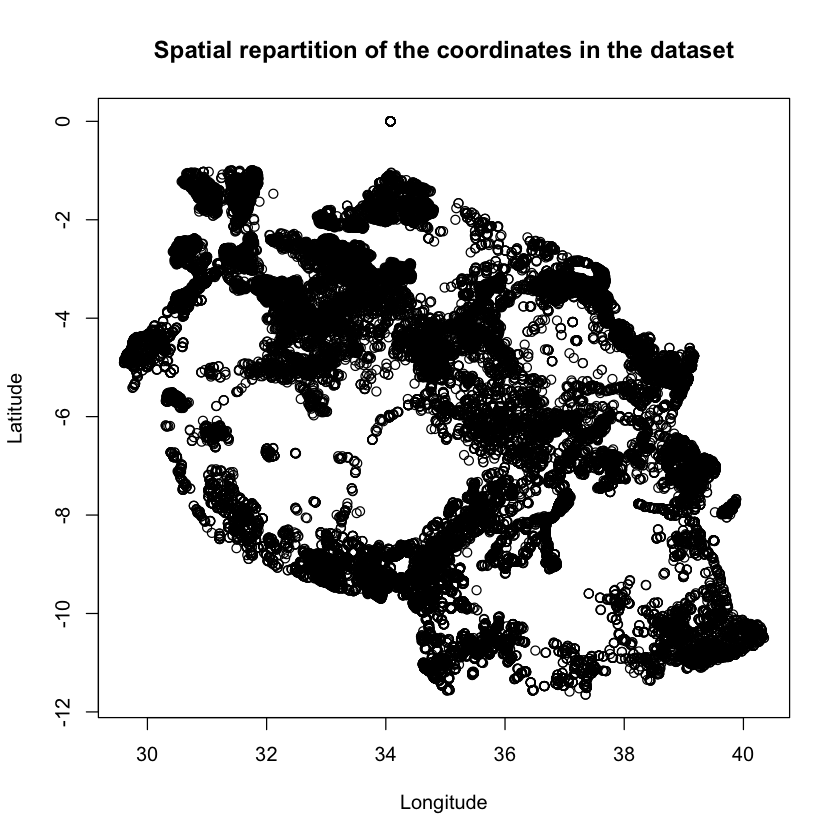

In [18]:
plot(demo_data$longitude,demo_data$latitude,xlab = "Longitude",ylab="Latitude",main="Spatial repartition of the coordinates in the dataset")

Concerning the *construction year* feature, it is equal to 0 for nearly 35% of the samples. In this particular case, replacing the values by the mean value of the feature does not seem logical, and deleting 35% of the dataset because of this particular feature is not an option either.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0    1986    1301    2004    2013 

[1] Number of samples having a construction year of 0 : 20709

[1] Percentage of samples having a construction year of 0 : 34.86

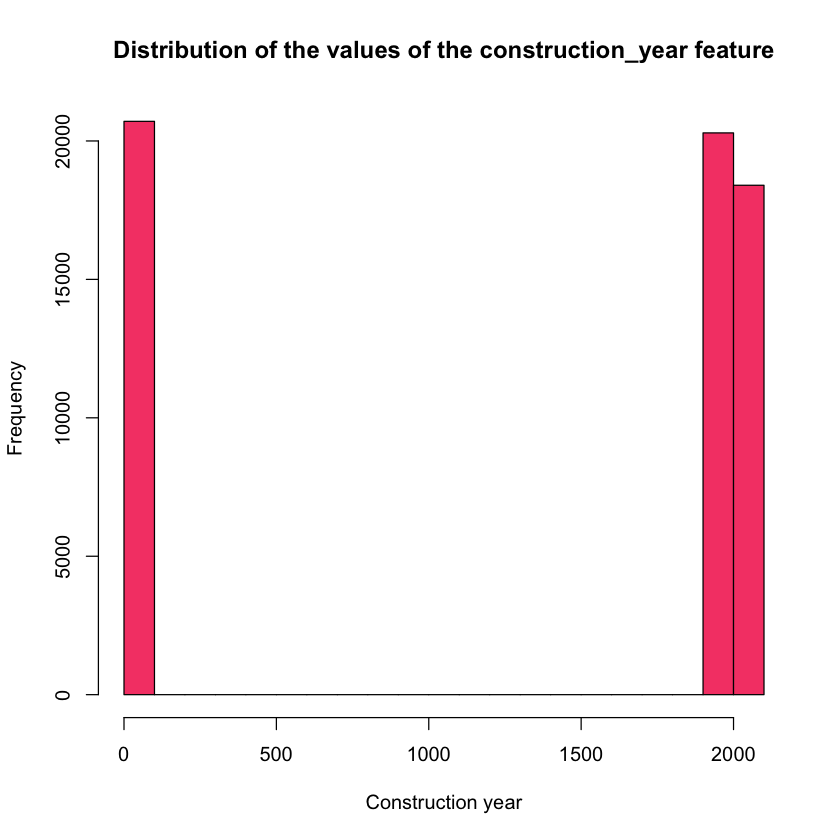

In [19]:
summary(demo_data$construction_year)
noquote(paste("Number of samples having a construction year of 0 :",dim(demo_data[demo_data$construction_year == 0,])[1]))
noquote(paste("Percentage of samples having a construction year of 0 :",round(100*dim(demo_data[demo_data$construction_year == 0,])[1]/nrow(demo_data),digits=2)))
hist(demo_data$construction_year,main = "Distribution of the values of the construction_year feature",xlab="Construction year",col="#f64975")

Therefore, we chose to divide the construction years into groups of 10 years, use it as a categorical variable with one-hot encoding and discard the one-hot encoded feature corresponding to the 0-year.

In [20]:
one_hot_construction_year <- function(df) {
    #Separate the construction years per decade
    df$construction_year[df$construction_year > 1959 & df$construction_year < 1970] = "1960s"
    df$construction_year[df$construction_year > 1969 & df$construction_year < 1980] = "1970s"
    df$construction_year[df$construction_year > 1979 & df$construction_year < 1990] = "1980s"
    df$construction_year[df$construction_year > 1989 & df$construction_year < 2000] = "1990s"
    df$construction_year[df$construction_year > 1999 & df$construction_year < 2010] = "2000s"
    df$construction_year[df$construction_year > 2009 & df$construction_year < 2020] = "2010s"
    df$construction_year <- as.factor(df$construction_year)
    
    #Apply one-hot encoding
    dum <- dummy.data.frame(df,names=c("construction_year"), sep="_")
    
    #Remove the 0-year feature
    df <- subset(dum,select=-c(construction_year_0))
    return(df)
}

## 1.2. Feature engineering : categorical variables

All the categorical variables present in the merged dataset are presented below.

In [21]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### 1.2.1. Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature *recorded by* contains only 1 factor, which is *GeoData Consultants Ltd*.

In [22]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


This feature is therefore removed from the dataset.

In [23]:
remove_useless_features <- function(df) {
    df <- subset(df,select=-c(recorded_by))
    return(df)
}

In [24]:
demo_data <- remove_useless_features(demo_data)

In [25]:
dim(demo_data)

[1] 59400    39

### 1.2.2. Boolean features

By analyzing the features that contain 3 classes, we see that some of them are boolean features (*public meeting* and *permit*), which take the values True, False or an empty string. There is also a feature *source class* that contains only 2 classes and an *unknown* class. By analyzing the distribution of the different classes of these features, we can see that the missing values are always very minoritary, we could therefore remove the problematic samples and encode these features as boolean 0-1 features.

The following plots show the data distributions for these 3 features.

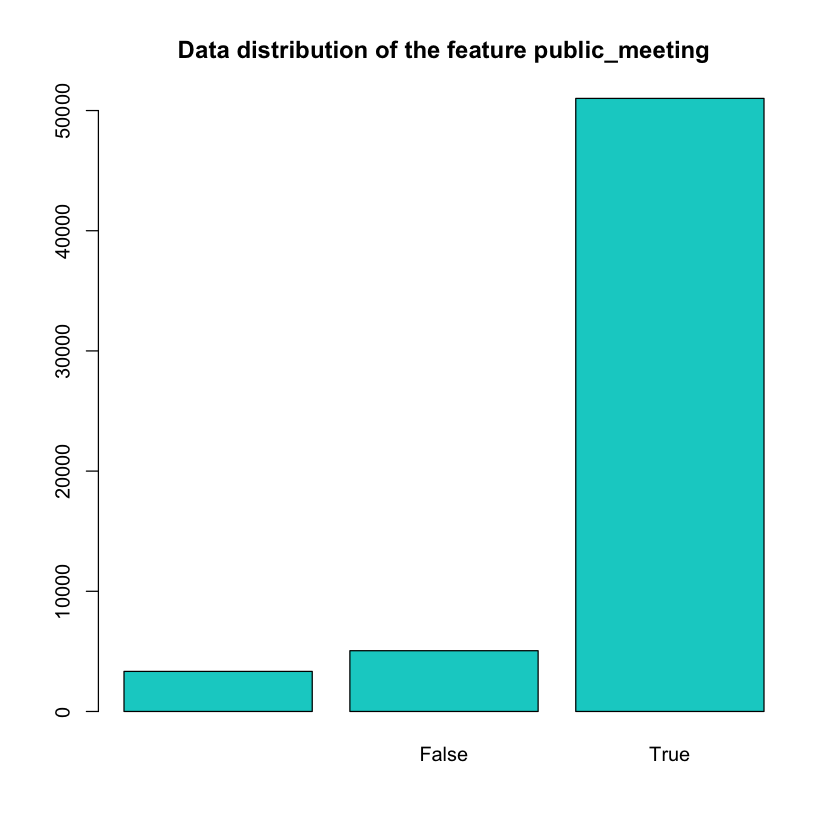

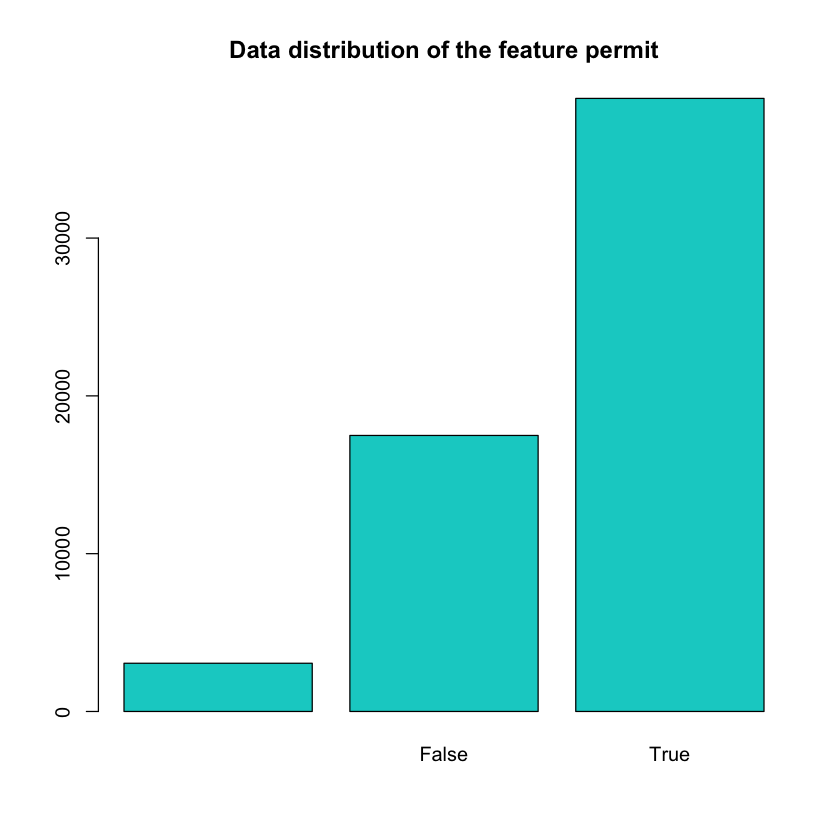

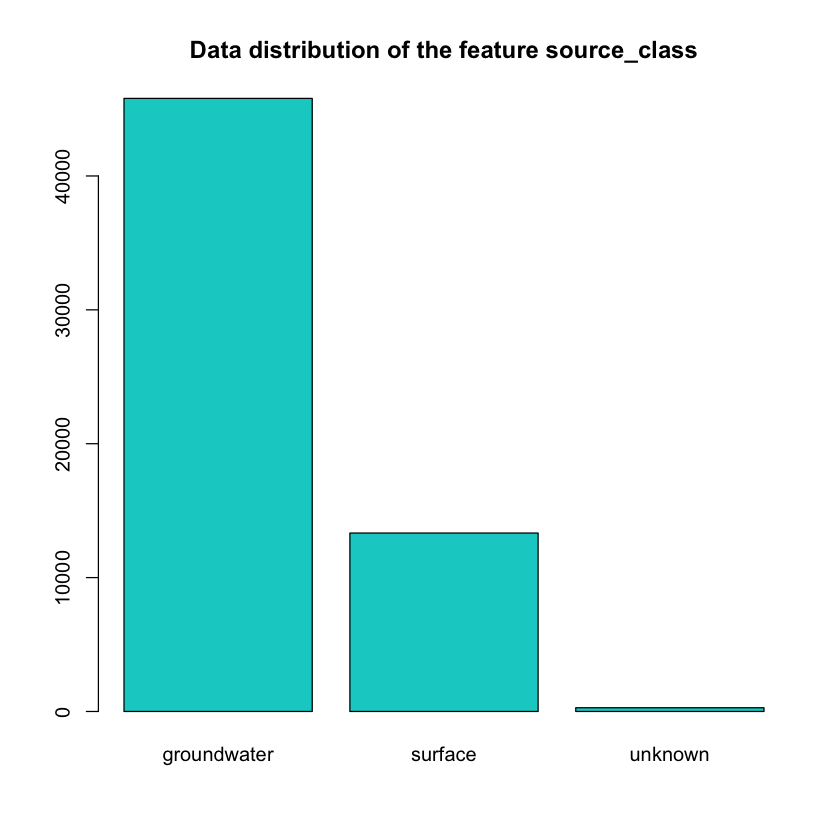

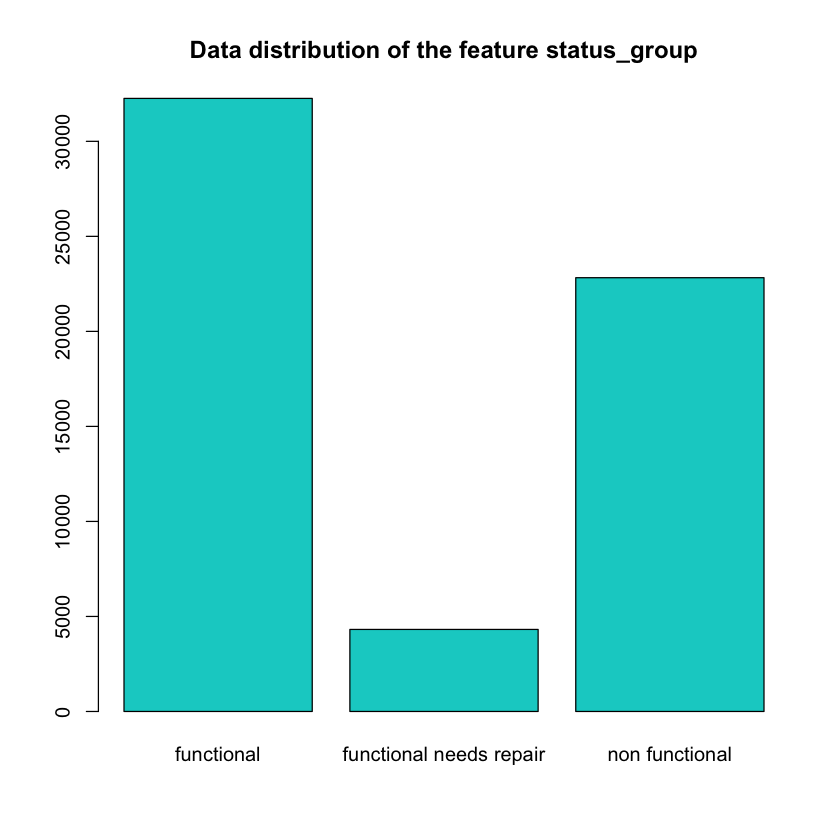

In [26]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l == 3) {
        barplot(table(data[,n]),col="#00cfcc",main=paste("Data distribution of the feature",n))
    }
}

In [27]:
create_binary_features_training <- function(df) {
#Discards the missing values and converts the boolean features to binary (0-1)
    
    #feature public_meeting
    df <- df[df$public_meeting != "", ] 
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    #feature permit
    df <- df[df$permit != "", ] 
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    #feature source_class
    df <- df[df$source_class != "unknown", ] 
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

Of course, we can not discard samples in the test set, as we are required to predict all the given samples. Therefore, the function is slightly adapted in order to avoid removing samples (missing values will be considered as 0s). This should not have a considerable impact, knowing that the missing values are very minoritary in these features.

In [28]:
create_binary_features_test <- function(df) {
#Converts the boolean features of the test set to binary (0-1)
    
    #feature public_meeting
    levels(df$public_meeting) <- c(levels(df$public_meeting), "1","0") 
    df$public_meeting[df$public_meeting == "True"] <- 1
    df$public_meeting[df$public_meeting != "1"] <- 0
    df <- transform(df, public_meeting = as.integer(as.character(public_meeting)))
    
    #feature permit
    levels(df$permit) <- c(levels(df$permit), "1","0") 
    df$permit[df$permit == "True"] <- 1
    df$permit[df$permit != "1"] <- 0
    df <- transform(df, permit = as.integer(as.character(permit)))
    
    #feature source_class
    levels(df$source_class) <- c(levels(df$source_class), "1","0") 
    df$source_class[df$source_class == "groundwater"] <- 1
    df$source_class[df$source_class != "1"] <- 0
    df <- transform(df, source_class = as.integer(as.character(source_class)))
    return(df)
}

In [29]:
demo_data <- create_binary_features_training(demo_data)

### 1.2.3. Convert the dates

The feature *date recorded* is a categorical variable but can easily be converted into a numerical one. To avoid having unnecessarily large values, the minimal date is substracted.

In [30]:
convert_date_to_numeric <- function(df) {
    df$date_recorded <- as.numeric(as.Date(df$date_recorded))
    print(min(df$date_recorded))
    df$date_recorded <- df$date_recorded - min(df$date_recorded)
    return(df)
}

In [31]:
demo_data <- convert_date_to_numeric(demo_data)

[1] 11974


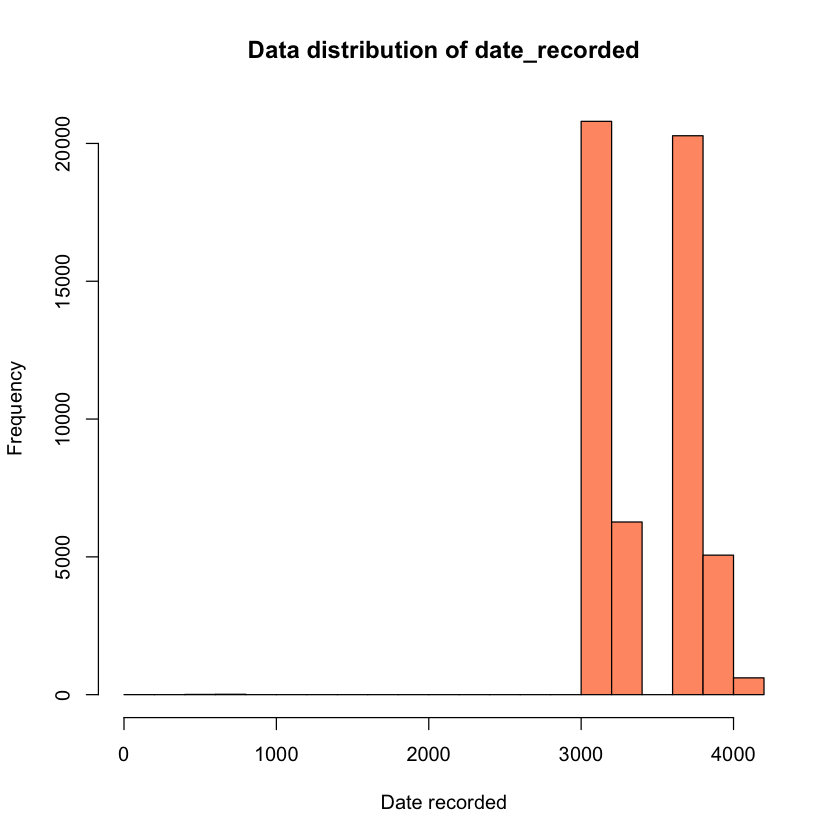

In [32]:
hist(demo_data$date_recorded,col = "#ff9973",main="Data distribution of date_recorded",xlab = "Date recorded")

### 1.2.4. Handpicking redundant features

Some features are noticeably redudant at first sight, and we can therefore reduce the number of features. For all these redundant features, we show the tables of their categories in order to assess if they are actually both necessary or if one could be removed.

In [33]:
table(data$extraction_type)
table(data$extraction_type_group)
table(data$extraction_type_class)


                  afridev                      cemo                    climax 
                     1770                        90                        32 
                  gravity             india mark ii            india mark iii 
                    26780                      2400                        98 
                      ksb                      mono               nira/tanira 
                     1415                      2865                      8154 
                    other other - mkulima/shinyanga         other - play pump 
                     6430                         2                        85 
        other - rope pump            other - swn 81               submersible 
                      451                       229                      4764 
                   swn 80                    walimi                  windmill 
                     3670                        48                       117 


        afridev         gravity   india mark ii  india mark iii            mono 
           1770           26780            2400              98            2865 
    nira/tanira           other  other handpump other motorpump       rope pump 
           8154            6430             364             122             451 
    submersible          swn 80    wind-powered 
           6179            3670             117 


     gravity     handpump    motorpump        other    rope pump  submersible 
       26780        16456         2987         6430          451         6179 
wind-powered 
         117 

In [34]:
table(data$management)
table(data$scheme_management)


         company            other   other - school       parastatal 
             685              844               99             1768 
private operator            trust          unknown              vwc 
            1971               78              561            40507 
 water authority      water board              wua              wug 
             904             2933             2535             6515 


                          Company             None            Other 
            3877             1061                1              766 
      Parastatal Private operator              SWC            Trust 
            1680             1063               97               72 
             VWC              WUA              WUG      Water Board 
           36793             2883             5206             2748 
 Water authority 
            3153 

In [35]:
table(data$waterpoint_type)
table(data$waterpoint_type_group)


              cattle trough          communal standpipe 
                        116                       28522 
communal standpipe multiple                         dam 
                       6103                           7 
                  hand pump             improved spring 
                      17488                         784 
                      other 
                       6380 


     cattle trough communal standpipe                dam          hand pump 
               116              34625                  7              17488 
   improved spring              other 
               784               6380 

In [36]:
table(data$source)
table(data$source_type)


                 dam             hand dtw                 lake 
                 656                  874                  765 
         machine dbh                other rainwater harvesting 
               11075                  212                 2295 
               river         shallow well               spring 
                9612                16824                17021 
             unknown 
                  66 


            borehole                  dam                other 
               11949                  656                  278 
rainwater harvesting           river/lake         shallow well 
                2295                10377                16824 
              spring 
               17021 

In [37]:
table(data$quantity)
table(data$quantity_group)


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 


         dry       enough insufficient     seasonal      unknown 
        6246        33186        15129         4050          789 

In [38]:
table(data$water_quality)
table(data$quality_group)


          coloured           fluoride fluoride abandoned              milky 
               490                200                 17                804 
             salty    salty abandoned               soft            unknown 
              4856                339              50818               1876 


 colored fluoride     good    milky    salty  unknown 
     490      217    50818      804     5195     1876 

In [39]:
table(data$payment)
table(data$payment_type)


            never pay                 other          pay annually 
                25348                  1054                  3642 
          pay monthly        pay per bucket pay when scheme fails 
                 8300                  8985                  3914 
              unknown 
                 8157 


  annually    monthly  never pay on failure      other per bucket    unknown 
      3642       8300      25348       3914       1054       8985       8157 

It is very clear to see that the presented features are redundant, in the sense that they are either completely identical (like *quantity* and *quantity_group*) or that one feature is just a slightly more detailed version of the other one. Therefore, a number of these features can be removed.

In [40]:
remove_redundant_features <- function(df) {
    df <- subset(df,select=-c(extraction_type_group,extraction_type_class,scheme_management,waterpoint_type_group,source_type,quantity_group,quality_group,payment))
    return(df)
}

In [41]:
demo_data <- remove_redundant_features(demo_data)

### 1.2.5. Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [42]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 1000) {
        print(noquote(paste("Feature",n,"has",l,"levels")))
        problematic_features <- c(problematic_features,n)
    }
}

[1] Feature funder has 1898 levels
[1] Feature installer has 2146 levels
[1] Feature wpt_name has 37400 levels
[1] Feature subvillage has 19288 levels
[1] Feature ward has 2092 levels
[1] Feature scheme_name has 2697 levels


For each one of these features, we check the distribution of the 5 most represented classes.

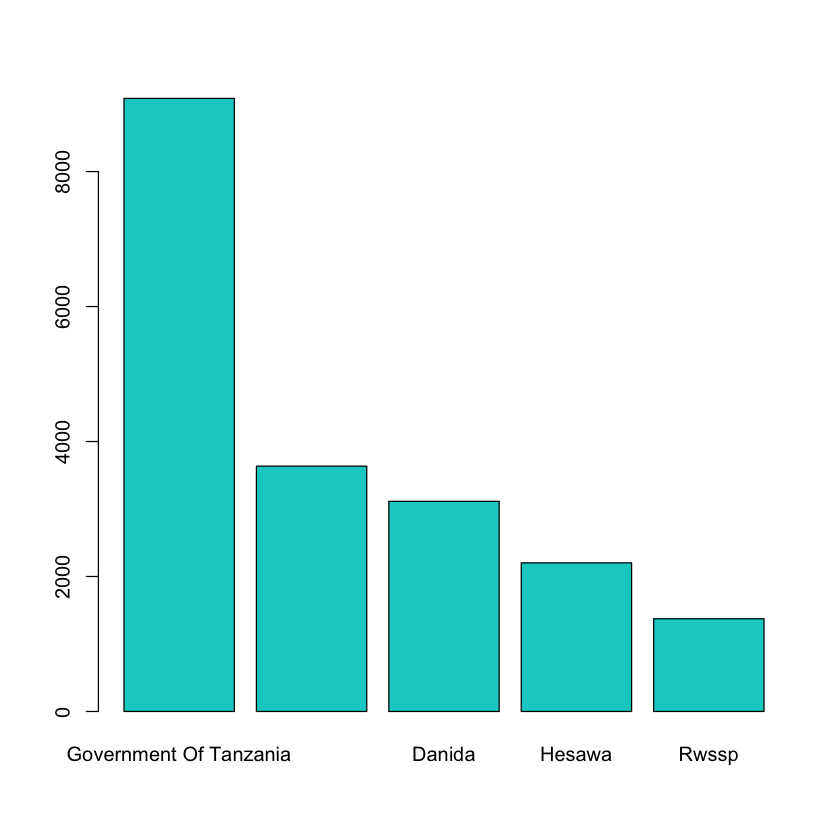

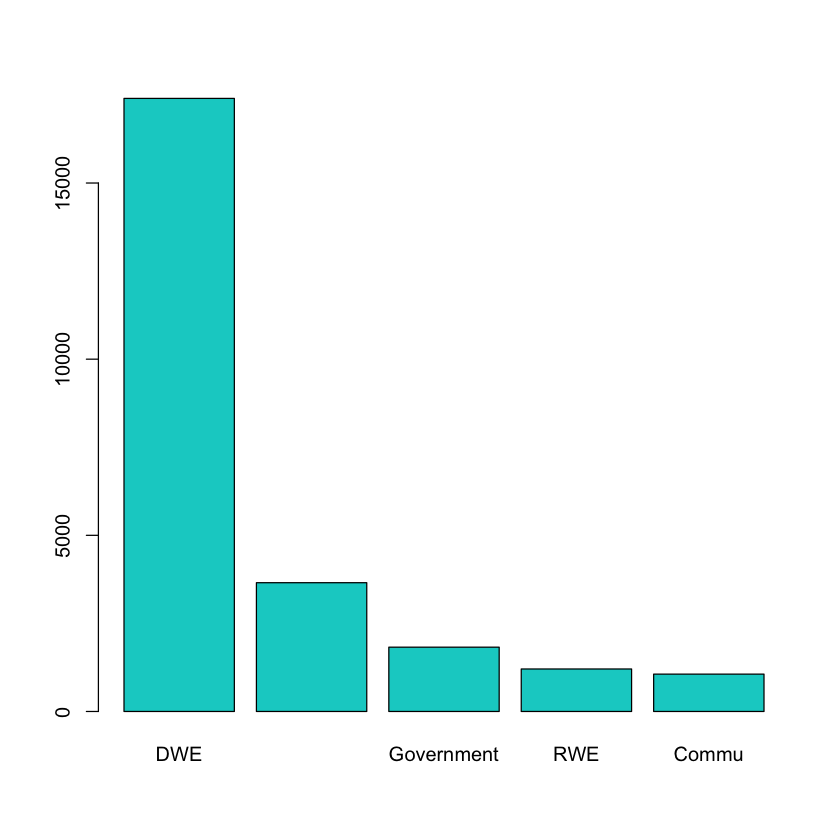

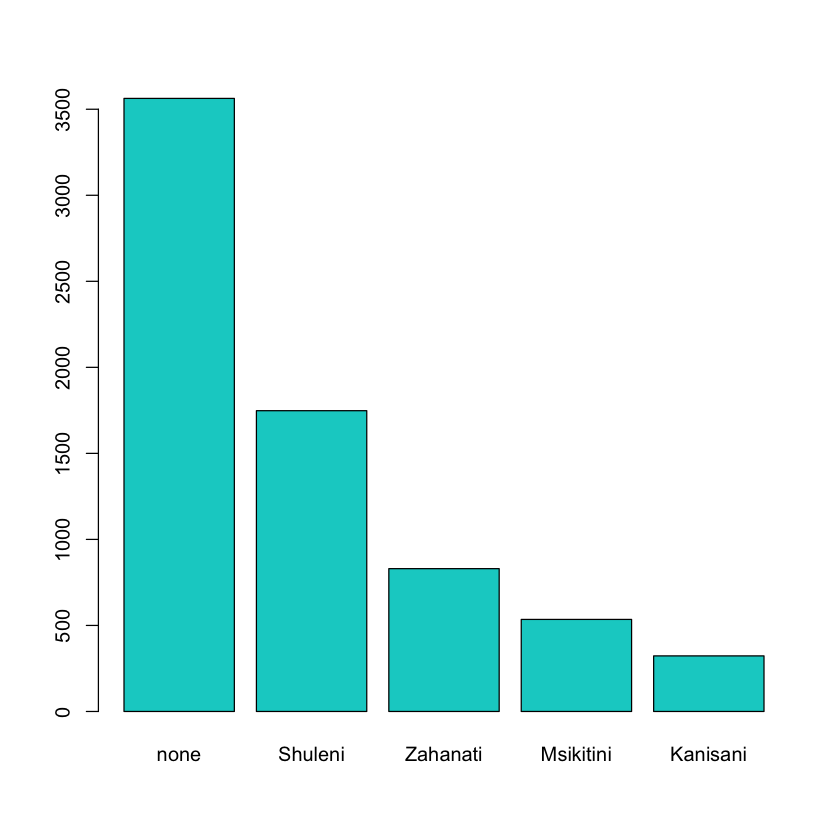

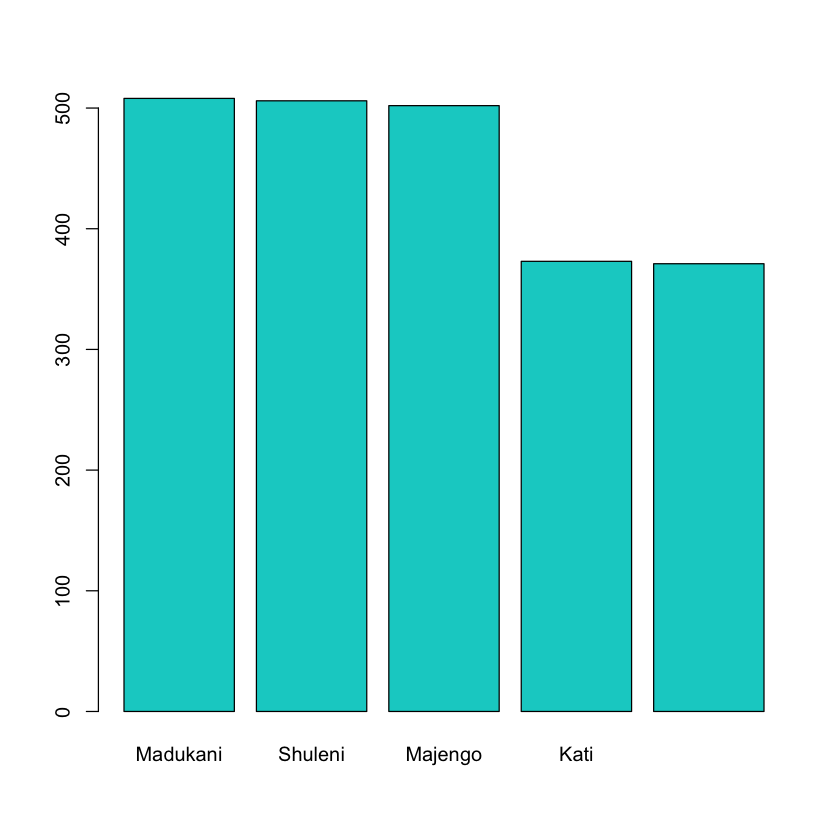

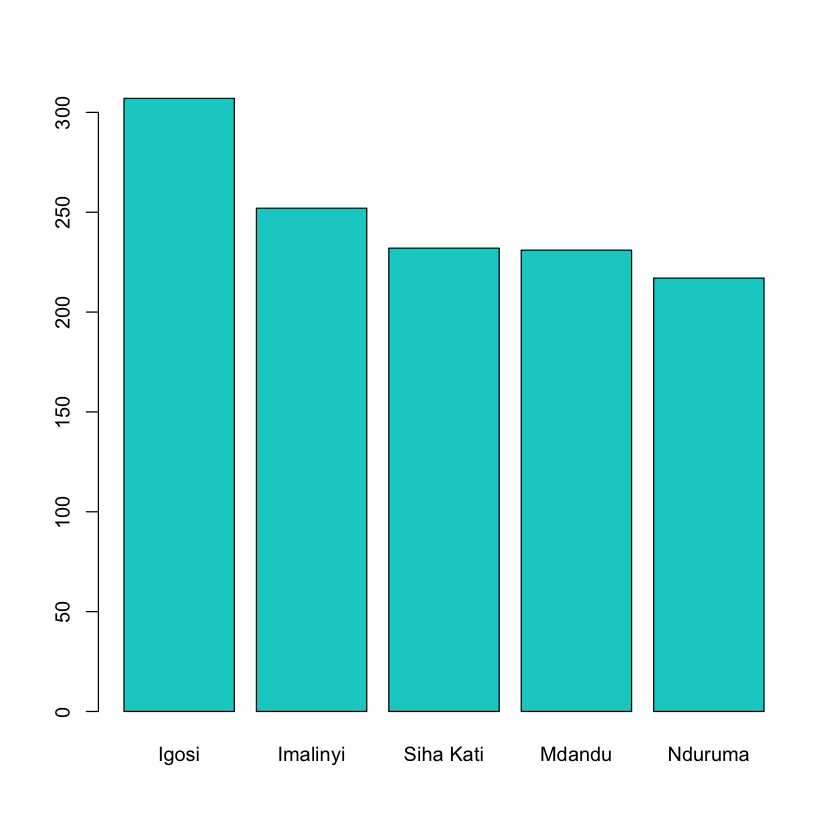

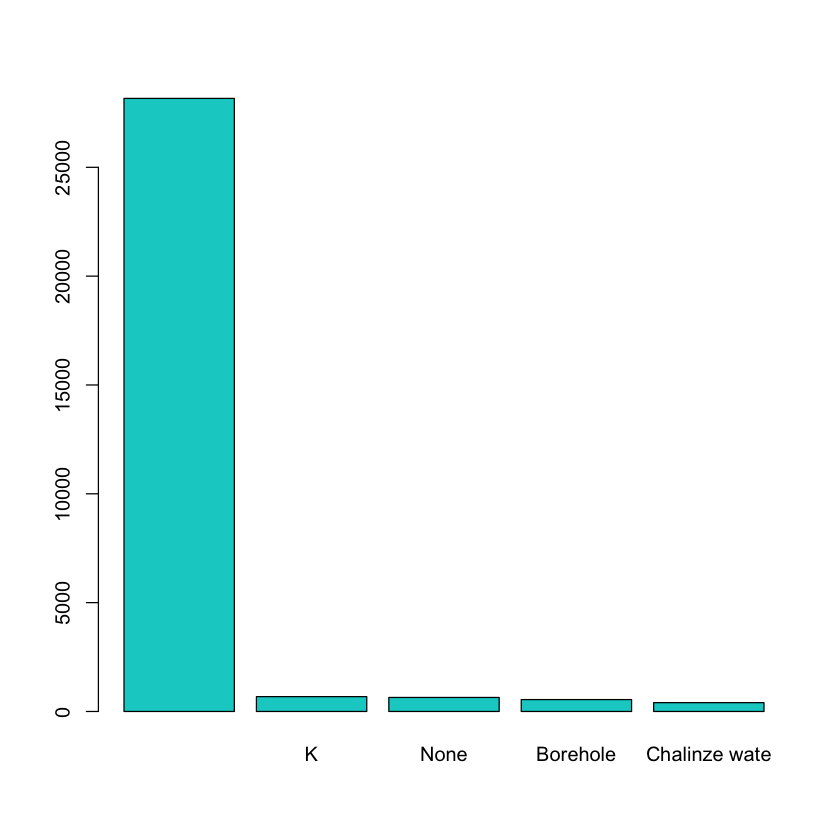

In [43]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot((sort(factors, decreasing=TRUE)[1:5]),col = "#00cfcc")
}

By taking a look at the barplots, some features might be interesting to keep because they have a large dominance in one category. For example, the *installer* feature contains more than 16000 samples with the category *DWE* so it might be useful to simply keep track of whether the installer is *DWE* or not (binary value). The same goes for *funder*, where there are a lot of samples corresponding to the class *Government Of Tanzania*. 

In [44]:
convert_installer_to_binary <- function(df) {
    levels(df$installer) <- c(levels(df$installer), "1","0") 
    df$installer[df$installer == "DWE"] <- 1
    df$installer[df$installer != "1"] <- 0
    df <- transform(df, installer = as.integer(as.character(installer)))
    return(df)
}

In [45]:
convert_funder_to_binary <- function(df) {
    levels(df$funder) <- c(levels(df$funder), "1","0") 
    df$funder[df$funder == "Government Of Tanzania"] <- 1
    df$funder[df$funder != "1"] <- 0
    df <- transform(df, funder = as.integer(as.character(funder)))
    return(df)
}

In [46]:
demo_data <- convert_installer_to_binary(demo_data)

In [47]:
demo_data <- convert_funder_to_binary(demo_data)

For the other features, the number of samples of the 5 most represented classes is extremely low, and these features will therefore be removed as they are too sparse to bring any additional information.

In [48]:
remove_features_many_levels <- function(df) {
    df <- subset(df,select=-c(wpt_name,subvillage,ward))
    return(df)
}

In [49]:
demo_data <- remove_features_many_levels(demo_data)

### 1.2.6. One-hot encoding

The remaining categorical variables in the dataset are one-hot encoded. Indeed, by removing the features with too many levels previously, this option is feasible and does not generate an incredibly large number of features. This allows to avoid encoding (factorizing) categorical variables by assigning an integer value to each class, which is not recommended as it implicitly implies a relation of order between the different classes, which is of course not the case most of the time.

In [50]:
one_hot_encoding_training <- function(df) {
#Applies one-hot encoding to the categorical variables of the training set
    categorical_variables <- which(sapply(subset(df,select=-c(status_group)),class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

In [51]:
one_hot_encoding_test <- function(df) {
#Applies one-hot encoding to the categorical variables of the test set
    categorical_variables <- which(sapply(df,class)=="factor")
    dum <- dummy.data.frame(df[,categorical_variables], sep="_")
    df <- cbind(df[,-categorical_variables],dum)
    return(df)
}

## 1.3. Feature engineering : numerical variables

### 1.3.1. Preprocess the coordinates

The dataset contains *longitude* and *latitude* features (that have already been preprocessed once) which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region. Although there is already an attribute *region_code* in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into *k* different geographical regions based on *longitude* and *latitude*. The advantage of this method compared to the *region_code* feature is that we can choose how small or large the different regions are.

It is necessary to determine *k* (the number of clusters) as well as the random seed used (which impacts on the *ordering* of the clusters). This is done by the following function, which basically makes a grid search over different values of *k* and of the random seed, and finds the ones having the maximal correlation with the output. This correlation is computed by one-hot encoding the target variable and summing the correlations to each of these 3 newly created features.

The following function takes some time to execute (around 25min) and is __not recommended to run__.

In [52]:
get_optimal_clustering_params <- function() {
#Determines the number of clusters and the random seed generating the 
#highest correlation to the target variable.
    best_correlation <- 0
    best_seed <- 1
    correlations <- numeric(length(5:40))
    
    #One-hot encoding the target variable
    dum <- dummy.data.frame(demo_data[,ncol(demo_data),drop=F],names=c("status_group"), sep="_")
    coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))

    for(k in 5:40) {
        for(s in 1:30) {
            set.seed(s)
            
            #k-means clustering
            km_res <- kmeans(coordinates,k)
            region_kmeans <- km_res$cluster
            correlation <- 0
            
            #Compute correlation to the output
            for(i in 1:ncol(dum)) {
                correlation <- correlation + abs(cor(region_kmeans,dum[,i]))
            }
            correlations[k] <- correlations[k] + correlation
            if(correlation > best_correlation) {
                best_k <- k
                best_correlation <- correlation
                best_seed <- s
            }
        }
    }
}

After running this function, the best results were identified as $k=8$ with a random seed of 19. We therefore now create a function to apply k-means clustering with these parameters. A new feature, called *region_kmeans* is therefore created in the dataset, and the *longitude* and *latitude* are removed. When a test set is preprocessed, we need to be able to recover the regions created in the training set, this is why the coordinates of the cluster centers are written to a file.

In [53]:
generate_regions <- function(df) {
#Applies k-mean clustering on the latitude and logitude features of the dataset
#with the previously identified optimal parameters
    set.seed(19)
    coordinates <- as.data.frame(cbind(df$longitude,df$latitude))
    #Apply 8-mean clustering
    km_res <- kmeans(coordinates,8)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- km_res$cluster
    #Write the coordinates of the cluster centers to a file
    write.csv(km_res$centers,"cluster_centers.csv")
    return(df)
}

When a test set is preprocessed, the previously written file is read to obtain the cluster centers. The cluster whose center has the minimal euclidian distance to the target coordinates is considered as the cluster for the corresponding sample.

In [54]:
closest_cluster <- function(x) {
#Returns the cluster for which the distance between x and the center of the cluster is minimal
    centers <- read.csv("cluster_centers.csv")
    centers <- centers[,c("V1","V2")]
    cluster_dist <- apply(centers, 1, function(y) sqrt(sum((x-y)^2)))
    return(which.min(cluster_dist)[1])
}

In [55]:
set_existing_regions <- function(df) {
#Sets the cluster numbers to the test set samples
    clusters2 <- apply(df[,c("longitude","latitude")], 1, closest_cluster)
    df <- subset(df,select=-c(longitude,latitude))
    df$region_kmeans <- clusters2
    return(df)
}

The graphical representation of the regions after the k-means clustering is shown below.

In [56]:
set.seed(19)
coordinates <- as.data.frame(cbind(demo_data$longitude,demo_data$latitude))
km_res <- kmeans(coordinates,8)
demo_data <- subset(demo_data,select=-c(longitude,latitude))
demo_data$region_kmeans <- km_res$cluster

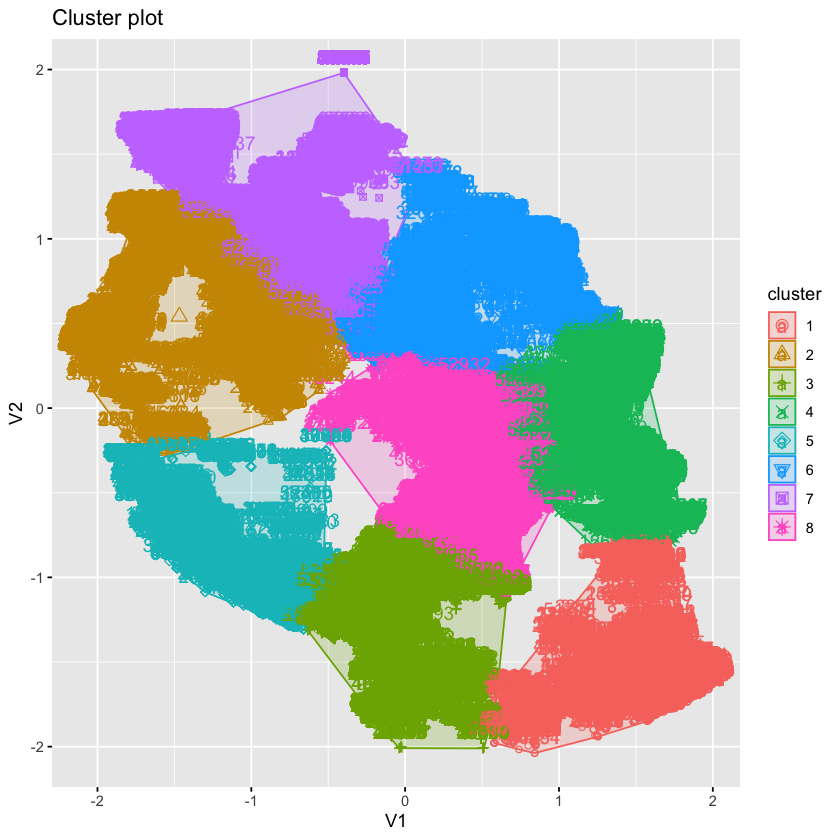

In [57]:
fviz_cluster(km_res,coordinates)

### 1.3.2. Remove useless numerical features

The feature $id$ is different for each sample, and does not bring any information. It is therefore removed.

In [58]:
noquote(paste("Number of different id values :",nlevels(as.factor(demo_data$id))))
noquote(paste("Total number of samples :",dim(demo_data)[1]))

[1] Number of different id values : 53042

[1] Total number of samples : 53042

In [59]:
remove_id <- function(df) {
    return(subset(df,select=-c(id)))
}

## 1.4. Dataset balancing

As shown previously, the target variable is not equiprobably distributed, one class is very much under-represented. In order to avoid the situation where the models will predict only the very frequent classes, some dataset balancing can be done. It is important to understand this does not necessarily yield better results, but it could, and this is why it was implemented and tested. Indeed, sometimes the frequency of apparition of certain classes is actually very relevant, and moreover if the dataset is large enough the minority class might be representative enough in the sense that it contains all relevant information in its features to be classified.

The 2 dataset balancing techniques that were tested are SMOTE and oversampling.

### 1.4.1. SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique. It selects a random minority class sample and finds its k nearest minority class neighbours. It picks one of these k neighbours and draws a line from the original sample to this chosen one, in the feature space. It then generates new samples along that line, which is effectively a linear combination between the original sample and one of its k nearest neighbours. By default, k is equal to 5. SMOTE combines undersampling of the majority classes and oversampling of the minority class, with the parameters ```perc.over``` and ```perc.under``` describing these behaviours.

__Improtant__ : as SMOTE effectively modifies the dataset itself and creates new samples, the accuracies obtained with SMOTE might not reflect the actual accuracies obtained on the DrivenData sumbission. This is why we also tested other techniques in parallel in case SMOTE produces data that is too far from the real dataset.

In [60]:
demo_data_copy <- demo_data

In [61]:
create_smote_dataset <- function(df) {
    df <- smote(status_group ~ ., df, perc.over = 3,perc.under=3)
    return(df)
}

In [62]:
demo_data <- create_smote_dataset(demo_data)

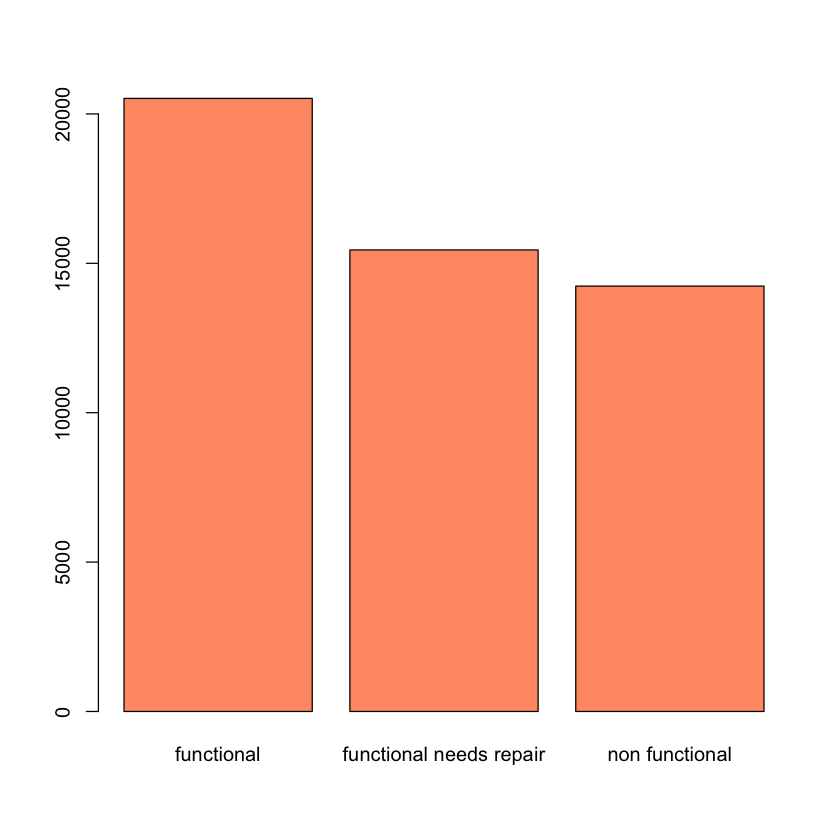

In [63]:
barplot(table(demo_data$status_group),col="#ff9973")

### 1.4.2. Over sampling

Another method was implemented, consisting in simply duplicating samples from the least represented class, allowing the models to have a more balanced vision on the different target variables. This method, however, did not yield better results and will therefore __not be considered in the rest of this notebook__.

In [64]:
create_over_sampling_dataset <- function(df) {
    to_dup <- df[df$status_group == "functional needs repair",]
    for(i in 1:1) {
        df <- rbind(df,to_dup)
    }
    return(df)
}

In [65]:
demo_data <- demo_data_copy

In [66]:
dem <- create_over_sampling_dataset(demo_data)

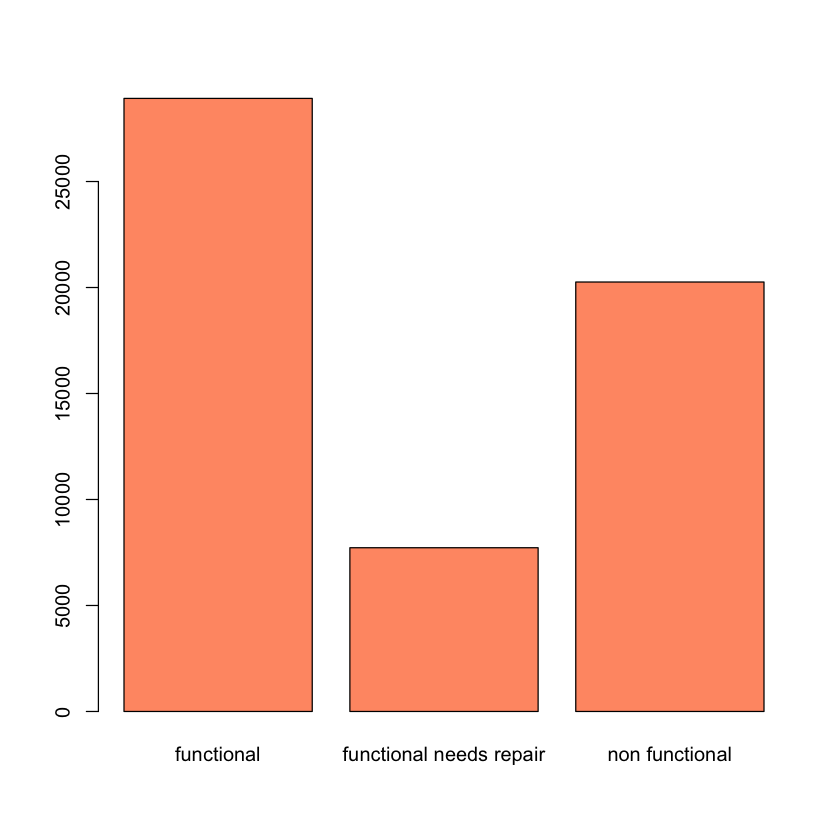

In [67]:
barplot(table(dem$status_group),col="#ff9973")

## 1.5. Feature selection

Once the dataset has been preprocessed, a feature selection is applied in order to keep only the appropriate number of features. This helps reducing the noise in the models as well as the execution times.

As we are planning to use the same preprocessing for multiple models, the presented techniques are filter methods, that do not depend on a model. We will therefore simply choose by hand the number of features we wish to keep. In the very last part of the project, an embedded feature selection will be realized.

### 1.5.1. mRMR on one-hot encoded data

The first feature selection procedure that was implemented was mRMR (minimum Redundancy Maximal Relevance), which aims to keep the features that are the most correlated to the target, but avoid using features that are too closely correlated together. Since the output is categorical, correlations are computed on the 3 features resulting from the one-hot encoding of the target variable, and averaged. The rest of the features are all numerical since they have been one-hot encoded previously, so no special workarounds are necessary for computing the redundancy.

Note that we also tried out another mRMR implementation using the target variable as a categorical variable. This is done by computing the correlation using chi-squared. The results were quite similar to the ones obtained with one-hot encoding the target variable and the execution times were much longer so we ended up discarding this method.

In [68]:
apply_mrmr_numerical <- function(df,k=NULL) {
    X <- subset(df,select=-c(status_group))
    dum <- dummy.data.frame(subset(df,select=c(status_group)),names=c("status_group"), sep="_")
    correlation <- numeric(ncol(X))
    for(i in 1:ncol(dum)) {
        correlation <- correlation + abs(cor(X,dum[,i]))
    }
    correlation <- correlation / 3
    n <- ncol(X)
    if(is.null(k)) {
        k <- n
    }
    selected_features <- c()
    candidate_features <- 1:n
    for(j in 1:k) {
        redundancy_score <- numeric(length(candidate_features))
        if (length(selected_features)>0) {
            cor_selected_candidates <- cor(X[,selected_features,drop=F],X[,candidate_features,drop=F])
            redundancy_score <- apply(cor_selected_candidates,2,mean)
        }
        mRMR_score <- correlation[candidate_features] - redundancy_score
        best_candidate <- candidate_features[which.max(mRMR_score)]
        selected_features<-c(selected_features,best_candidate)
        
        candidate_features <- setdiff(candidate_features,best_candidate)
    }
    return(selected_features)
}

In [69]:
get_k_mrmr_variables <- function(df,k) {
    sorted_features <- apply_mrmr_numerical(df[,1:ncol(df)],k=100)    
    df <- df[,sorted_features[1:k]]
    return(df)
}

### 1.5.3. PCA

Another method has been used to compare the results. PCA is a technique that can be used to perform dimensionality reduction. We selected a reduced number of principal components based on the scree plot showing the percentage variation for every principal components. We have performed the PCA on the entire training set and then projected it on the test set.
We decided not to use PCA with SMOTE. Because PCA can be seen as a way of identifying patterns in data to be able to compress it, we did not wanted to interfere too much with the original distribution of samples in the training set by adding artificial samples through SMOTE. We tried to use it anyway to confirm our thought, and the differences in accuracy between the submission on driven data and the accuracy obtained with a cross validation on the training set were too large, so we did not exploit the combination of PCA and SMOTE further.


In [70]:
pca <- function(df,nb_components){
    X <- df[,setdiff(colnames(df),"status_group")]
    #Compute PCA on the full input dataset X and return the dataset transformed in the space of principal components
    X_pca <- prcomp(X, scale=TRUE) 
    return(X_pca)
}

pca_select <- function (df,X_pca,nb_components){
    #Project the PCA to the a specific dataset
    X_pca <- predict(X_pca,newdata=df)[,1:nb_components]
    return(X_pca)
}

Before applying the PCA, here is what the data look like

In [71]:
load(file="Files/Preprocessing/demo_data_pca_.Rdata")
head(demo_data_pca)

,amount_tsh,date_recorded,funder,gps_height,installer,num_private,region_code,district_code,population,public_meeting,permit,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,construction_year_2000s,construction_year_2010s,source_class,region_kmeans,basin_Internal,basin_Lake_Nyasa,basin_Lake_Rukwa,basin_Lake_Tanganyika,basin_Lake_Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma_/_Southern_Coast,basin_Wami_/_Ruvu,region_Arusha,region_Dar_es_Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha_Rural,⋯,management_parastatal,management_private_operator,management_trust,management_unknown,management_vwc,management_water_authority,management_water_board,management_wua,management_wug,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group,payment_type_annually,payment_type_monthly,payment_type_never_pay,payment_type_on_failure,payment_type_other,payment_type_per_bucket,payment_type_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride_abandoned,water_quality_milky,water_quality_salty,water_quality_salty_abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand_dtw,source_lake,source_machine_dbh,source_rainwater_harvesting,source_river,source_shallow_well,source_spring,waterpoint_type_cattle_trough,waterpoint_type_communal_standpipe,waterpoint_type_communal_standpipe_multiple,waterpoint_type_dam,waterpoint_type_hand_pump,waterpoint_type_improved_spring,waterpoint_type_other,status_group
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
2,0,3064,0,1978,0,0,11,4,20,1,0,0,0,0,0,1,0,1,3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,functional
3,0,3086,0,0,0,0,1,4,0,1,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,functional
4,10,3885,0,1639,0,0,3,5,25,1,1,0,0,0,1,0,0,1,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,functional
5,0,3081,0,0,0,0,1,4,0,1,1,0,0,0,0,0,0,1,8,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,non functional
6,50,3057,0,28,0,0,60,43,6922,1,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,functional
7,0,3659,1,0,0,0,17,3,0,1,1,0,0,0,0,0,0,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,non functional


After applying the PCA, the data becomes less interpretable. We decided to only keep the 50 first principal components, which are the ones with the highest percentage variation.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,status_group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,-0.2028042,-2.1974208,3.9518757,-1.6859544,2.457083,-1.4141969,0.5711891,1.5727665,3.2926193,-4.75000934,3.5968513,2.163086012,-0.5853612,0.04897984,-2.814504835,0.9032781,-0.04455189,2.5082348,-5.01676996,1.4983223,0.47301304,-1.3317348,-12.9204857,3.25494156,0.8252447,-5.4669947,2.0454912,1.7106039,2.6172296,-0.8303245,1.219476821,3.2474298,-1.0620894,1.5706124,2.5907923,-1.87988790,-1.1634630,-0.4914930,-0.008861324,2.1382430,0.26647570,-0.83629592,0.4213554,1.2508053,0.0514273,-0.09027627,0.65949165,0.8916970,-1.19595687,-1.0935068,functional
3,-1.3537650,4.4054815,0.2300856,-4.8235831,-3.165782,-1.7349835,-3.4878624,-2.9633238,-2.0829777,-0.31991229,-0.8464173,3.104219807,0.3048387,2.25262204,3.081024499,-1.1346994,1.18712359,-1.7118191,-0.78525987,0.6729712,0.27952542,0.2281007,-1.6118741,-0.22996769,-0.6441772,-0.7020672,-0.3210819,-1.0159101,0.2750175,0.5424619,0.001853737,-1.1142065,-0.6918596,-1.3346455,0.2828068,0.03243957,2.6216184,1.0767136,2.053847281,-1.0633363,0.18688419,-0.05555621,-0.7560481,1.1920414,0.3415271,-0.83378954,0.05806281,0.3369703,-0.19579433,0.7992335,functional
4,4.4398795,-0.2121255,-2.7745963,0.8893792,-1.383983,-2.8960125,1.8660315,1.5784315,-0.5958401,0.93990094,0.4052684,1.184905994,1.2501271,-0.02268669,1.528314745,-0.3329383,-2.38753355,1.8022800,0.82657411,-1.9974722,-0.49092275,2.6839612,-0.1390582,-0.32429148,-3.2418081,-2.2215083,0.7522440,-1.2485919,0.4406207,1.2222238,0.021328396,0.5569788,1.9404540,0.3660352,-0.5615061,-0.42279304,-0.5193689,0.3209998,2.255003775,0.7602623,-2.33078488,-0.91828458,-0.2159424,0.3915159,-1.4213396,-1.70518497,-0.42791176,-0.6644118,-1.05923876,0.4736107,functional
5,-3.1700548,-0.2461996,0.1711284,-2.9722792,-1.397580,-0.7221501,-1.2876159,-1.4199005,-1.1699410,0.04191665,-1.5950860,2.267460428,0.4140308,1.50857862,1.488398481,-0.4447455,2.55114844,-0.5512442,0.07725917,0.5369505,-0.16553022,0.2562668,-1.1555597,-0.09015625,-0.6032681,-0.7040995,-0.9477055,-2.7247265,0.7165389,0.5782403,0.424166488,-1.6484566,-1.5779575,0.1031783,1.9706042,2.01400982,3.4032430,0.4990994,1.833083858,-0.2761085,-0.71602115,2.04290792,1.0014150,2.1570062,-0.9116731,-1.19356493,0.56899532,-0.1870176,-0.04852707,0.6818474,non functional
6,-1.8693144,9.1786915,0.2557252,-1.9148169,3.267183,0.1097038,3.0506294,2.1481789,1.2782051,1.78407384,2.3204718,-0.007486551,-2.7229477,-0.66976412,-1.804365071,-2.4068860,1.72041404,-0.1990046,1.45851314,-2.5494886,-0.30890613,0.6745532,0.7872147,2.57677197,0.5395346,-0.8751629,-2.3373011,-0.9397362,-0.5678756,-1.3639322,-3.175646665,1.2096059,0.5638549,-1.6464228,2.3095635,1.43443070,-1.2617552,-0.4837968,1.217726170,-0.5080283,0.83876850,-0.29788235,0.1391823,-1.6506320,-0.2493662,-0.17329738,-2.62833942,0.9895242,1.03775974,-0.3394755,functional
7,-3.0228751,-0.9319009,-2.6435347,1.1646468,-1.434580,2.5479344,-1.4015204,-0.3910873,1.0120195,-2.57189153,-1.9091583,0.707205673,-1.3266027,0.25609308,-0.003425709,1.0424070,-2.62854135,0.2981262,1.81781251,-0.7702058,0.08076695,-1.2314871,-0.7950736,0.22188152,-0.4942766,0.1828444,-0.2358292,-0.2407586,-0.8897535,-0.8532126,-0.591762184,-0.4813359,0.5161517,-0.7880775,1.9169319,-0.61226535,0.8639823,-0.9471704,-0.171002950,0.3198300,-0.01987446,0.42375454,-1.2004815,-1.3688719,0.8416289,0.79256609,0.95828025,1.4083763,0.99491458,0.6748302,non functional


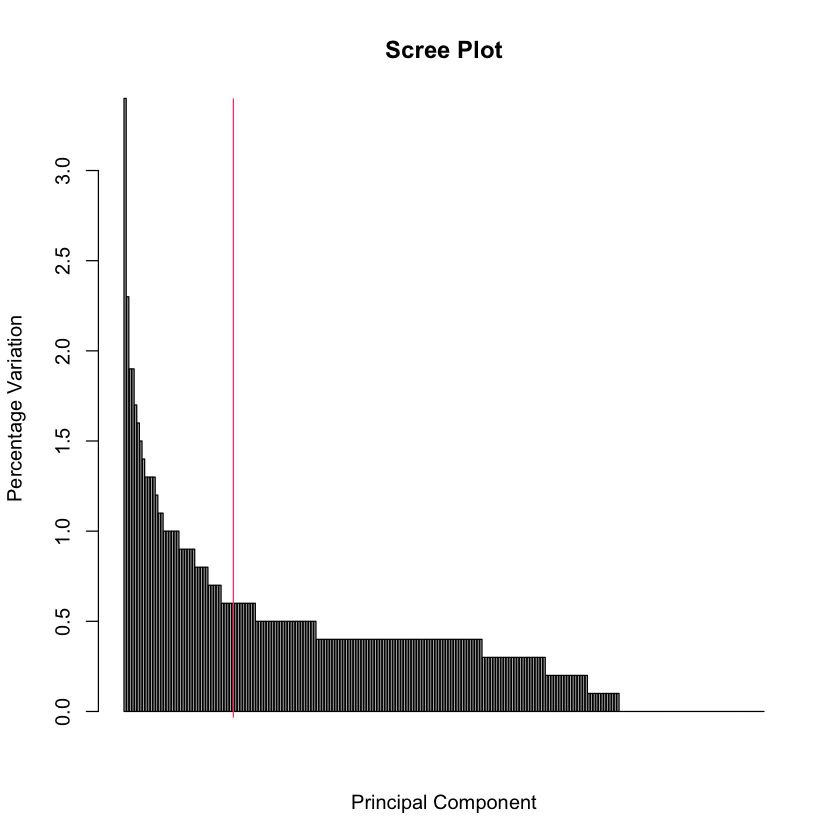

In [72]:
X_pca <- pca(demo_data_pca)
nb_components <- 50

#Make a scree plot
X_pca.var <- X_pca$sdev^2
X_pca.var.per <- round(X_pca.var/sum(X_pca.var)*100, 1)
barplot(X_pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percentage Variation")
abline(v = nb_components,col="#f64975")

X_pca <- pca_select(demo_data_pca,X_pca,nb_components)

demo_data_pca <- cbind(X_pca,subset(demo_data_pca,select=c(status_group)))
head(demo_data_pca)

## 1.6. Preprocessing functions

All the preprocessing methods described previously are grouped into functions that apply all the preprocessing at once.

Since the test set has to have the same column names as the training set, the column names of the preprocessed training set is stored in an external file. When preprocessing the test set, we make sure that the column names of the training set and of the test set are the same, and in the same order.

In [73]:
preprocess_basic_training <- function(df){
#Calls all the "basic" preprocessing techniques displayed above. These will be used
#whatever feature selection is chosen.
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    df <- remove_useless_features(df)
    df <- create_binary_features_training(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- generate_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_training(df)
    #Remove spaces from the column names
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    return (df)
}

In [74]:
preprocess_training_mrmr <- function(df) {
#Preprocessing using mRMR
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    df_ordered <- get_k_mrmr_variables(df,100)
    #Order the columns 
    df_ordered <- df_ordered[,order(names(df_ordered))]
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    #By default, SMOTE is always used
    df <- create_smote_dataset(df)
    #The column names of the preprocessed training dataset are written to a file
    write(colnames(subset(df,select=-c(status_group))),"features.txt")
    return(df)
}

In [75]:
preprocess_training_pca <- function(df) {
#Preprocessing using PCA. Notice that SMOTE is not used with PCA as explained previously. 
    df <- preprocess_basic_training(df)
    df <- df[,order(colnames(df))]
    write(colnames(subset(df,select=-c(status_group))),"features.txt")   
    X_pca <- pca(df)
    save(X_pca, file = "Files/Preprocessing/X_pca.Rdata")
    df_pca <- df[,setdiff(colnames(df),"status_group")]
    df_no_status <- pca_select(df_pca,X_pca,50)
    #Order the columns
    df_ordered <- df_no_status[,order(colnames(df_no_status))]
    df <- cbind(df_ordered,subset(df,select=c(status_group)))
    return(df)
}

In [76]:
preprocess_test <- function(df,pca) {
#Preprocessing the test set.
#param pca : boolean indicating whether we want to use PCA or not
    df <- remove_id(df)
    df <- remove_scheme_name(df)
    df <- one_hot_construction_year(df)
    df <- remove_redundant_features(df)
    #df <- create_over_sampling_dataset(df)
    df <- remove_useless_features(df)
    df <- create_binary_features_test(df)
    df <- convert_date_to_numeric(df)
    df <- convert_installer_to_binary(df)
    df <- convert_funder_to_binary(df)
    df <- discard_unrealistic_coordinates(df)
    df <- set_existing_regions(df)
    df <- remove_features_many_levels(df)
    df <- one_hot_encoding_test(df)
    colnames(df) <- gsub(colnames(df),pattern = " ", replacement = "_")
    features_list <- scan("features.txt",what = " ")
    column_names <- colnames(df)
    #Removing all columns that did not appear in training
    cols_to_remove <- c()
    for(c in 1:ncol(df)) {
        if(!(column_names[c] %in% features_list)) {
            cols_to_remove <- c(cols_to_remove,c)
        }
    }
    df <- df[,-cols_to_remove]
      
    #Adding empty columns for missing features
    test_columns <- colnames(df)
    for(c in 1:length(features_list)) {
        if(!(features_list[c] %in% test_columns)) {
            #print(features_list[c])
            df[,features_list[c]] = 0
        }
    }
    #Order the columns
    df <- df[,order(names(df))]
    if(pca){
        load(file = "Files/Preprocessing/X_pca.Rdata")
        df_no_status <- pca_select(df,X_pca,50)
        df <- df_no_status[,order(colnames(df_no_status))]
    }
    return(df)
}


We call these functions to create the datasets we will use with the following models.

In [77]:
data_preproc_mrmr <- preprocess_training_mrmr(data)
data_preproc_pca <- preprocess_training_pca(data)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 11974


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

  amount_tsh basin_Internal basin_Lake_Nyasa basin_Lake_Rukwa
2          0              0                0                0
3          0              0                0                0
4         10              0                0                0
5          0              0                0                0
6         50              0                0                0
7          0              1                0                0
  basin_Lake_Tanganyika basin_Lake_Victoria basin_Pangani basin_Rufiji
2                     0                   0             0            1
3                     0                   0             0            0
4                     0                   0             1            0
5                     0                   0             0            0
6                     0                   0             0            0
7                     0                   0             0            0
  basin_Ruvuma_/_Southern_Coast basin_Wami_/_Ruvu construction_year_1

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 11974


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

# 2. Model selection

## 2.1. Network based models


In this section, we present 3 differents neural based models. The Neural Network (NNET), the Radial Basis Function (rbf) and a Multi Layer Perceptron (mlp). Note that because these neural based models ouput a probability of belonging to one of the three categories (functional, function needs repairs and non-functional), we chose to use as prediction the class where the highest probability was found. A hyperparameter of those models are the number of hidden neurons that is used. Different values for this hyperparameter were therefore tested in order to find the ones yielding the best solution in terms of accuracy.

These 2 functions will be used to compute the accuracy of our models, and will be reused throughout this section.

In [78]:
accuracy_From_Confusion_Matrix <- function(confusion_matrix) {   
    #This function add the missing target variables in the confusion matrix (if any) and compute
    #the accuracy of the prediction
    #param confusion_matrix : confusion matrix
    #return : accuracy of the prediction
    full_confusion_matrix <-matrix(0, nrow = 3, ncol = 3)
    colnames(full_confusion_matrix) <- colnames(confusion_matrix)
    rownames(full_confusion_matrix) <- colnames(confusion_matrix)
    full_confusion_matrix[rownames(confusion_matrix),] <- confusion_matrix[rownames(confusion_matrix),]
    return((full_confusion_matrix[1,1]+full_confusion_matrix[2,2]+full_confusion_matrix[3,3])/sum(full_confusion_matrix))
}
compute_Results <- function(Y,Y_hat,explanatory_string,verbose=TRUE) {
    #Compute the accuracy and missclassification rate and display the results
    # param Y : real values 
    # param Y_hat : values predicted by the model
    # param explanatory_string : for clarity purpose, precise which model has been used for the prediction
    # verbose : TRUE if we want to display the results, FALSE otherwise
    confusion_matrix <- table(Y_hat,Y)
    accuracy <- accuracy_From_Confusion_Matrix(confusion_matrix)
    misclassification_rate <- 1 - accuracy
    if(verbose){
        print(paste("[INFO] - Confusion matrix",explanatory_string,":"))
        print(confusion_matrix)
        print(paste("[INFO] - Accuracy",explanatory_string,":",accuracy))
        print(paste("[INFO] - Misclassification rate",explanatory_string,":",misclassification_rate))
    }
    return(accuracy)
}

### 2.1.1 Grid search with cross validation

Cross validation of our different models, the cross validation has been used for the tunning and to validate our results. In order to determine the best number of hidden nodes of our neural based models, we try to use the models with up to 100 hidden neurons. We did not keep increasing the number of hidden neurons further because of the running time required. The grid search has been executed on both preprocessed data (with mRMR and with PCA).



In [79]:
cross_Validation_InOut_Sample_NN <- function(hidden_nodes,k,model_type,data) {
    #Perform a cross validation of k folds and a in sample and out of sample verification of 
    # a neural model.
    # param hidden_nodes : number of hidden nodes 
    # param k : number of fold of the cross validation
    # param model_type : type of model we want to evaluate (either "nnet","rbf" or "mlp")
    # param data : data on which the cross validation will be performed
    # return : the accuracy for the cross validation, the in sample verification and out of sample verification
   
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    #Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    #Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))
    
     #Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)

    #For each unique group:
    for(i in 1:k){
        #Take the group as a hold out or test data set, the remaining groups as a training data set.
        #Format of training and data set adapted to the model use
        if (model_type=="nnet"){
            data<-data.frame(scaled ,data[,"status_group"])
            names(data)[length(names(data))]<-"status_group" 
            train_data <- data[-splits[[i]],]
            test_data <- data[splits[[i]],]
            Y <- test_data[,target_variable]
            print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
        }
        if(model_type=="rbf" || model_type=="mlp"){
            train_data <- scaled[-splits[[i]],]
            train_label <- data[-splits[[i]],target_variable]
            test_data <- scaled[splits[[i]],]
            test_label <- data[splits[[i]],target_variable]
            n_train <- dim(train_data)[1]
            Y <- test_label
            #the models do not work with the "space" character
            test_label <- gsub(test_label,pattern = " ", replacement = "")
            train_label <- gsub(train_label,pattern = " ", replacement = "")
        } 
        
        #Fit a model on the training set and evaluate it on the test set
        if(model_type=="nnet"){
            model <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,
                                 skip=FALSE, maxit=100,rang=0.2,MaxNWts=20000,trace=FALSE)
        }

        if(model_type=="rbf"){
            model <- RSNNS::rbf(as.matrix(train_data),
                           decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
        }
        if(model_type=="mlp"){
            model <- mlp(train_data, decodeClassLabels(train_label), size =hidden_nodes, maxit = 100)  
        }
        
        #Prediction on test set

        Y_pred <- predict(model,test_data)
        colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        Y_hat <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
       
        accuracy_vec[i] <- compute_Results(Y,Y_hat,paste(i,"fold"))
        }

    #Results of the cross validation
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    #Results of in and out of sample
    accuracy <- inOut_Sample_Test_NN(data,scaled,target_variable,data_idx,half_split,hidden_nodes,model_type)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}

To better show the stability and reliability of the cross validation, we compared the results obtained with an in sample and out of sample test. Indeed, the advantage of the cross validation is that we can hope for more accurate results as the risk of overfitting is reduced. The out of sample verification can also be a good indicator of accuracy. However it is subject to larger variation because of the reduce number of tests performed.

In [80]:
inOut_Sample_Test_NN <- function(data,scaled,target_variable,data_idx,half_split,hidden_nodes,model_type) {
     #Perform a in sample and out of sample verification of a neural model.
    # param data : data on which the in and out of sample verification will be performed.
    # param scaled : scale data which the rbf and mlp model will use
    # param target_variable : values we want to predict
    # param data_idx : sequence of number to shuffle the data
    # param half_split : number which represent half of the values present in the dataset
    # param hidden_nodes : number of hidden nodes 
    # param model_type : type of model we want to evaluate (either "nnet","rbf" or "mlp")
    
    # return : the accuracy for the in sample verification and out of sample verification
   
    #Split training-test for in/out of sample predictions
    if(model_type=="nnet"){
        data<-data.frame(scaled ,data[,"status_group"])
        names(data)[length(names(data))]<-"status_group" 
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
    } 
    if(model_type=="rbf" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        n_train <- dim(train_data)[1]
    } 
    train_label <- data[data_idx[1:half_split],target_variable]
    train_label_accuracy <- train_label
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    Y <- test_label
    #the models do not work with the "space" character
    test_label <- gsub(test_label,pattern = " ", replacement = "")
    train_label <- gsub(train_label,pattern = " ", replacement = "")
    #Model for in and out of sample
    if(model_type=="nnet"){
        model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=20000)
    } 
    if(model_type=="rbf"){
        model_single_out <- RSNNS::rbf(as.matrix(train_data),
                       decodeClassLabels(as.matrix(train_label)), # Training labels must be provided with one-hot-encoding
                       size=hidden_nodes, 
                       maxit=75, 
                       initFuncParams=c(0, 1, 0, 0.01, 0.01),
                       learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
    } 
    if(model_type=="mlp"){
        model_single_out <- mlp(train_data, decodeClassLabels(train_label), size =hidden_nodes, maxit = 100)
    } 
    
    #Prediction 
    
    #In sample evaluation 
    Y_pred<-predict(model_single_out,train_data[,-target_variable])
    colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
    Y_hat_single_out_in_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
    #Out of sample evaluation 
    Y_pred<-predict(model_single_out,test_data[,-target_variable])
    colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
    Y_hat_single_out_out_sample <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
    
    accuracy_in_sample <- compute_Results(train_label_accuracy,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- compute_Results(Y,Y_hat_single_out_out_sample,"Out sample")
    
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}

In [81]:
apply_CV_InOut_Comp_NN <- function(hidden_nodes,k,model_type,data) {
    # Vary the number of hidden nodes and perform a cross validation, and an in and out of sample verification  

    # param hidden_nodes : number of hidden nodes 
    # param model_type : type of model we want to evaluate (either "nnet","rbf" or "mlp")
    # param data : data on which the in and out of sample verification and the cross validation will be performed.
    # return : the accuracy for the cross validation, the in sample verification and out of sample verification
   
    #Split training-test for in/out of sample predictions
    accuray_in_sample_vec <- numeric()
    accuray_out_sample_vec <- numeric()
    accuray_cv_vec <- numeric()
    #test different number of hidden nodes
    for(nb_hidden_nodes in hidden_nodes){
        print(paste("[INFO] - Testing h=",nb_hidden_nodes))
        results <- cross_Validation_InOut_Sample_NN(nb_hidden_nodes,k,model_type,data)
        accuray_in_sample_vec <- c(accuray_in_sample_vec,results$in_sample)
        accuray_out_sample_vec <- c(accuray_out_sample_vec,results$out_sample)
        accuray_cv_vec <- c(accuray_cv_vec,results$cv)
    }
    return (list(in_sample=accuray_in_sample_vec,out_sample=accuray_out_sample_vec,cv=accuray_cv_vec))
}

The grid search has been executed on the preprocessed data with mRMR and also with PCA and stored in different files for each feature selection technique in order to load them without the running time. It is recommended __to not run__ this following cell due to a long running time. To run it, uncomment the last lines of the cell.
To perform the cross validation with another model change the model_type to either "mlp", "nnet", "rbf".

In [82]:
display_Results_NN <- function() {
    plot(parameters,accury_vec$in_sample,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy",sub=model_type)
    lines(parameters,accury_vec$in_sample)
    lines(parameters,accury_vec$out_sample,col="blue")
    lines(parameters,accury_vec$cv,col="red")
    legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))
}
model_type <- "mlp"
k <- 5
parameters <- list(1,5,10,20,40,60,100)
#UNCOMMENT THE FOLLOWING LINES TO RUN THE CROSSVALIDATION (LONG EXECUTION TIMES)
# parameters <- list(3,5,10,20,40,60,100) # if rbf
# accury_vec <- apply_CV_InOut_Comp_NN(parameters,k,model_type,data_preproc_pca)
# display_Results_NN()
# accury_vec <- apply_CV_InOut_Comp_NN(parameters,k,model_type,data_preproc_mrmr)
# display_Results_NN()

In [83]:
plot_CV_mrmr <- function(param,model_feature,zoom) {
    #Plot the result obtained for the tunning of our models with mRMR    #Plot the result obtained for the tunning of our models with mRMR
    plot(parameters,error_in_sample_vec,type="n",main=paste("Classification accuracy as a function of number of", param, sep = " "),xlab=param,ylab="Accuracy",sub=model_feature,ylim=zoom)
    lines(parameters,error_in_sample_vec)
    lines(parameters,error_out_sample_vec,col="blue")
    lines(parameters,error_cv_vec,col="red")
}
plot_CV_pca <- function () {    
    #Plot the result obtained for the tunning of our models with PCA
    lines(parameters,error_in_sample_vec,lty=2)
    lines(parameters,error_out_sample_vec,col="blue",lty=2)
    lines(parameters,error_cv_vec,col="red",lty=2)
    legend("bottomright",legend=c("In sample (mrmr)","Out of sample(mrmr)","CV(mrmr)","In sample (pca)","Out of sample(pca)","CV(pca)"),col=c("black","blue","red","black","blue","red"),lty=c(1,1,1,2,2,2))
}

Experiments have been made upstream to save time. Here are the graphs we used to select the hyperparameters for our models. 


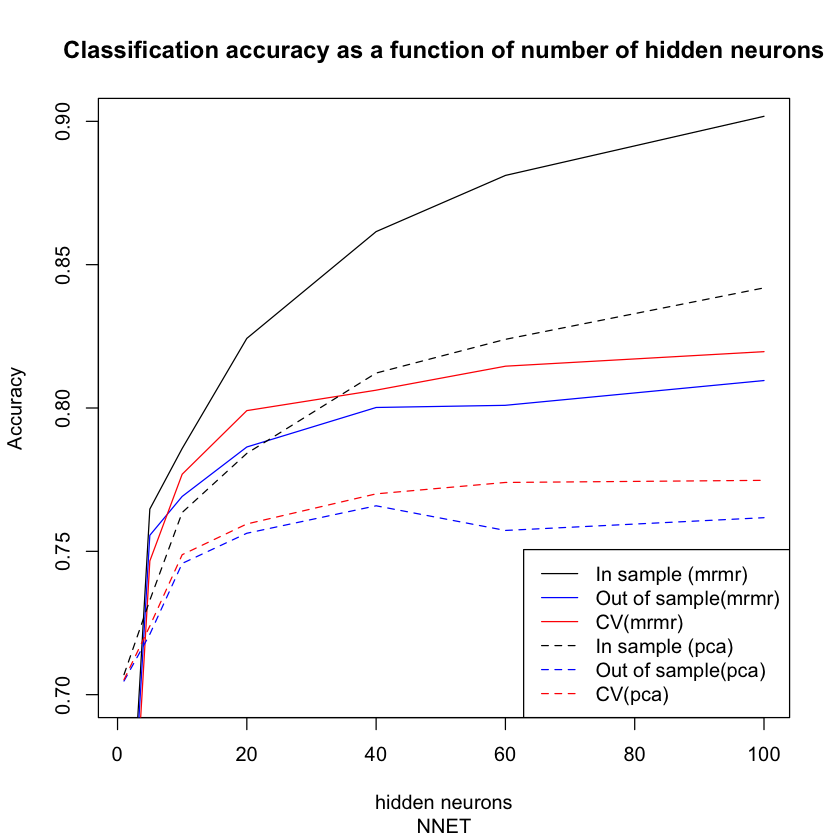

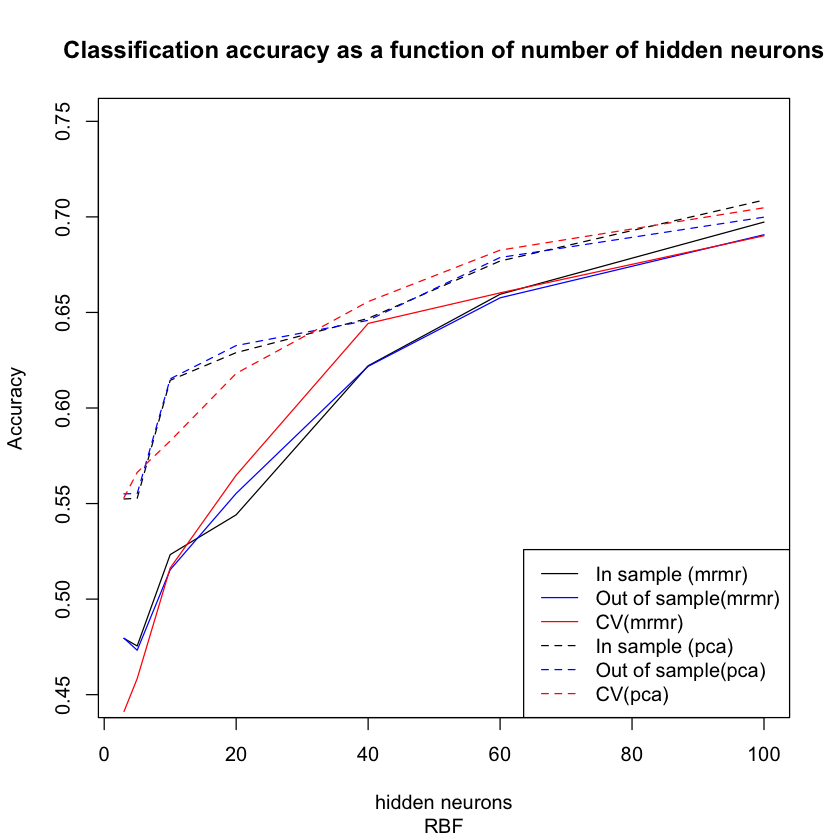

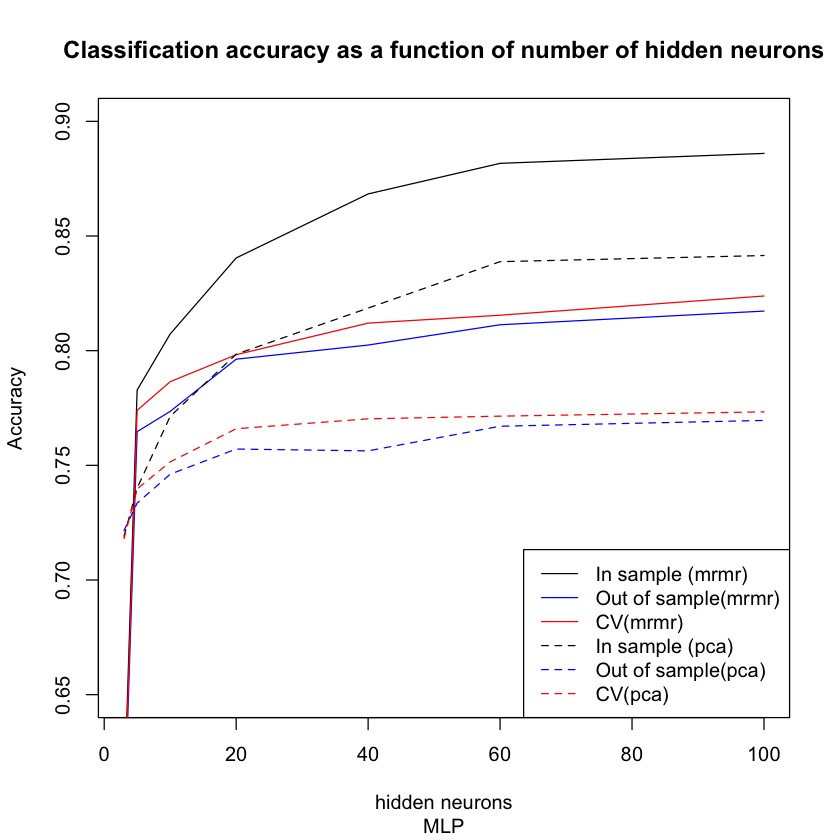

In [84]:
parameters <- list(1,5,10,20,40,60,100)

load("Files/CrossVal/CV_nn_mrmr.Rdata")
plot_CV_mrmr ("hidden neurons","NNET",c(0.7,0.9))
load("Files/CrossVal/CV_nn_pca.Rdata")
plot_CV_pca()

load("Files/CrossVal/CV_rbf_mrmr.Rdata")
parameters <- list(3,5,10,20,40,60,100)
plot_CV_mrmr ("hidden neurons","RBF",c(0.45,0.75))
load("Files/CrossVal/CV_rbf_pca.Rdata")
plot_CV_pca()

load("Files/CrossVal/CV_mlp_mrmr.Rdata")
plot_CV_mrmr ("hidden neurons","MLP",c(0.65,0.90))
load("Files/CrossVal/CV_mlp_pca.Rdata")
plot_CV_pca()

A stagnation of the performance can be observed when increasing the values of the parameters. The cross validation results are the ones we used as the validation metric as it provides more realistic accuracy than the two others methods of evaluation.
Note that the in sample results are not good indicators of accuracy as it is usually too optimistic due to the overfitting.
Here are the best parameter value for each model:
NNET : 100 hidden neurons with MRMR (81.96% of accuracy)
RBF : 100 hidden neurons with PCA (70.47% of accuracy)
MLP : 100 hidden neurons with MRMR (82.38% of accuracy)

We did not try larger number of hidden neurons as the gain in performance is very small compared to the computation time required. The gain in accuracy start to slow down after 60 hidden neurons for the NNET and 40 hidden neurons for the MLP.
Remark : the multi layer perceptron (MLP) allows us to use multi layers, however no gain in performance has been observed when using this option. Therefore, we only kept 1 layer to gain in computation time.

### 2.1.2 Bagging

Function that handles the bag version of every model. To improve the performance of the models, we tried to use a bag version of our models using the best parameters found previously. The choice of the final prediction is made through a majority vote.

In [85]:
Bagging_NN <- function(n_bagging_resamples,model_type,hidden_nodes,data) {
    # Perform a prediction using the bag version of a neural model. The bag model is based on a majority vote
    
    # param n_bagging_resamples : number of resample for the bagging
    # param model_type : type of model we want to evaluate (either "nnet","rbf" or "mlp")   
    # param hidden_nodes : number of hidden nodes 
    # param data : data on which the in and out of sample verification and the cross validation will be performed.
    # return : the accuracy of the bagged model and single model, and the models used for the prediction
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    #Shuffle the dataset randomly.
    set.seed(1717)
    data_idx <- sample(1:nrow(data))
    
    #Normalize dataset
    data_n <- data[,-target_variable]
    scaled <- scale(data_n)
    
    #Split shuffled dataset into training and test set, the format is adapted depending on the type of model
    if(model_type=="nnet"){
        # Normalize dataset
        data<-data.frame(scaled ,data[,"status_group"])
        names(data)[length(names(data))]<-"status_group" 
        train_data <- data[data_idx[1:half_split],]
        test_data <- data[data_idx[(half_split+1):nrow(data)],]
        n_train <- nrow(train_data)
        Y_hat_bagged<-array(0,c(length(test_data),1))
        Y <- test_data[,target_variable]
    }
     if(model_type=="rbf" || model_type=="mlp"){
        train_data <- scaled[data_idx[1:half_split],]
        train_label <- data[data_idx[1:half_split],target_variable]
        test_data <- scaled[data_idx[(half_split+1):nrow(data)],]
        test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
        n_train <- nrow(train_data)
        Y_hat_bagged<-array(0,c(dim(test_data)[1],1))
        Y <- test_label
        #the models do not work with the "space" character
        test_label <- gsub(test_label,pattern = " ", replacement = "")
        train_label <- gsub(train_label,pattern = " ", replacement = "")
    }
   
    Y_pred_models<-numeric()
    accuracy_vec<-array(0,c(1,n_bagging_resamples))

    for(i in 1:n_bagging_resamples){
        #Resample data from the training set
        I_bag <- sample(seq(1,n_train),replace=TRUE)
        #Fit model
        if(model_type == "nnet"){
            model <- nnet (status_group ~ .,train_data[I_bag,],skip=FALSE,
                       size=hidden_nodes, maxit=75,trace=F,rang=0.2,MaxNWts=20000)
            Y_pred <- predict(model,test_data[,-target_variable])
        }
        if(model_type=="rbf"){
            model <- RSNNS::rbf(as.matrix(train_data[I_bag,]),
                           decodeClassLabels(as.matrix(train_label[I_bag])), # Training labels must be provided with one-hot-encoding
                           size=hidden_nodes, 
                           maxit=75, 
                           initFuncParams=c(0, 1, 0, 0.01, 0.01),
                           learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
            Y_pred <- predict(model,test_data)
            colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        }
        if(model_type=="mlp"){
            model <- mlp(train_data[I_bag,], decodeClassLabels(train_label[I_bag]), size = hidden_nodes, maxit = 100)
            Y_pred <- predict(model,test_data)
            colnames(Y_pred) <- c("functional", "functional needs repair", "non functional")
        }

        result_classification <- colnames(Y_pred)[max.col(Y_pred,ties.method="first")]
        Y_pred_models <- cbind(Y_pred_models,result_classification)
        accuracy_vec[i] <- compute_Results(Y,result_classification,paste(i,"th model"),verbose=F)

        #Store model
        if(i==1){
            models_bagged<-list(model)
        }
        else{
            models_bagged <- c(models_bagged,list(model))
        }
    }

    #Majority vote of the classifiers to make the prediction
    Y_hat_bagged <- apply(Y_pred_models,1,function(x) names(which.max(table(x))))
    accuracy_bag <- compute_Results(Y,Y_hat_bagged,"bagged model")
    print(accuracy_bag)

    #Single model
    if(model_type == "nnet"){
     model_single_out <- nnet(status_group ~ ., data=train_data,size=hidden_nodes,trace=F,skip=FALSE,maxit=100,rang=0.2,MaxNWts=20000)   
    }
    if(model_type == "rbf"){  
     model_single_out <- model_single_out <- RSNNS::rbf(as.matrix(train_data),
                       decodeClassLabels(train_label),
                       #nOutputs=3,
                       size=hidden_nodes, 
                       maxit=150, 
                       initFuncParams=c(0, 1, 0, 0.01, 0.01),
                       learnFuncParams=c(1e-8, 0, 1e-8, 0.1, 0.8), linOut=T, trace=T)
    }
    if(model_type=="mlp"){
        model_single_out <- mlp(train_data, decodeClassLabels(train_label), size = hidden_nodes, maxit = 10)
    }
    Y_pred_single_out <- predict(model_single_out,test_data[,-target_variable])
    colnames(Y_pred_single_out) <- c("functional", "functional needs repair", "non functional")
    Y_hat_single_out <- colnames(Y_pred_single_out)[max.col(Y_pred_single_out,ties.method="first")]
    accuracy_single_out <- compute_Results(Y,Y_hat_single_out,"single model")

    return(list(accuracy_bagged=accuracy_bag,accuracy_simple=accuracy_single_out,bagging_accuracies=accuracy_vec,bag_models = models_bagged, single_model = model_single_out ))
}

Because of the running time, we limited the bagging to 1 model with a limited number of hidden nodes (40) and a limited number of bagging resamples (5).

__To perform the bagging with another model change the model_type to either "mlp", "nnet" or "rbf"__.

In [87]:
results <- Bagging_NN(n_bagging_resamples=5,"mlp",hidden_nodes=40,data_preproc_mrmr)

[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    8938                    1221           1703
  functional needs repair        541                    6230            286
  non functional                 738                     278           5168
[1] "[INFO] - Accuracy bagged model : 0.810102378201809"
[1] "[INFO] - Misclassification rate bagged model : 0.189897621798191"
[1] 0.8101024
[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    8545                    1046           1820
  functional needs repair        910                    6383            451
  non functional                 762                     300           4886
[1] "[INFO] - Accuracy single model : 0.789308050830578"
[1] "[INFO] - Misclassification rate single m

All the tests and running have been made upstream, the accuracy obtained can be found here under. We have run those tests with 15 bagging examples and with the optimal parameters found previously (so __obtained by setting hidden_nodes to 100 and n_bagging_resamples to 15 in the previous function, yielding higher execution times__).
As we can see, the bag version of every model except the NNET is better than the single model.


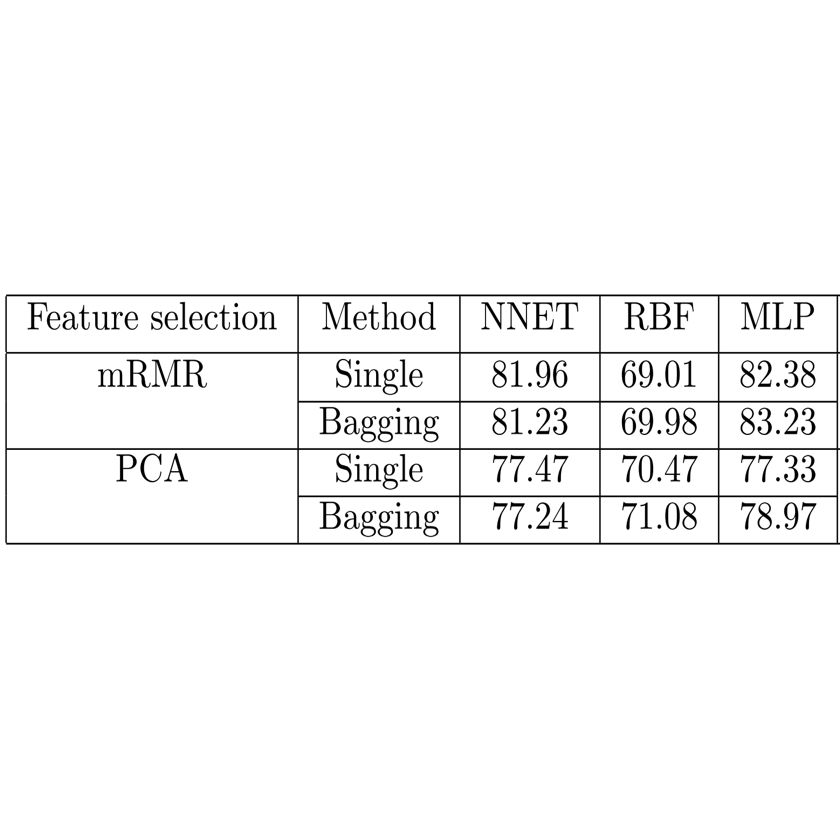

In [86]:
img <- readPNG("neural_tab.PNG")
grid::grid.raster(img,width=1.0,height=0.3,interp=TRUE)

## 2.2. Tree based model : Random Forest


The second model that was implemented is a Random Forest. A hyperparameter of this model is the number of trees that is used. Different values for this hyperparameter were therefore tested in order to find the one yielding the best solution in terms of accuracy.

### 2.2.1 Grid search with cross validation

Once again, we performed a cross validation to tune the model.

In [88]:
cross_Validation_InOut_Sample_RF <- function(nb_trees,k,data) {
    # Perform a cross validation of k folds and a in sample and out of sample verification of 
    # the random forest.
    # param nb_trees : number of trees 
    # param k : number of fold of the cross validation
    # param data : data on which the cross validation will be performed
    # return : the accuracy for the cross validation, the in sample verification and out of sample verification
    
    #Cross validation
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    #Shuffle the dataset randomly.
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    #Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))


    #For each unique group:
    for(i in 1:k){
        #Take the group as a hold out or test data set, the remaining groups as a training data set.
        #Format of training and data set adapted to the model use
        train_data <- data[-splits[[i]],]
        test_data <- data[splits[[i]],]
        Y <- test_data[,target_variable]
        print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))

        #Fit a model on the training set and evaluate it on the test set   
        model <- randomForest(x=train_data[,-c(target_variable)],
                      y=as.factor(train_data[,c(target_variable)]),
                      xtest=test_data[,-c(target_variable)],
                      ytest=as.factor(test_data[,c(target_variable)]),
                      ntree=nb_trees,keep.forest=TRUE)
        Y_hat <- predict(model,newdata = test_data[,-target_variable])

        #Prediction on test set
        Y_hat <- predict(model,newdata = test_data[,-target_variable])   
        accuracy_vec[i] <- compute_Results(Y,Y_hat,paste(i,"fold"))
    }

    #Results of the cross validation
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    #Results of in and out of sample
    accuracy <- inOut_Sample_Test_RF(data,target_variable,data_idx,half_split,nb_trees)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}

In [89]:
inOut_Sample_Test_RF <- function(data,target_variable,data_idx,half_split,nb_trees) {
      #Perform a in sample and out of sample verification of the random forest model.
    # param data : data on which the in and out of sample verification will be performed.
    # param target_variable : values we want to predict
    # param data_idx : sequence of number to shuffle the data
    # param half_split : number which represent half of the values present in the dataset
    # param nb_trees : number of trees
    
    # return : the accuracy for the in sample verification and out of sample verification
  
    #Split training-test for in/out of sample predictions
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    test_label <- data[data_idx[(half_split+1):nrow(data)],target_variable]
    train_label <- data[data_idx[1:half_split],target_variable]
    Y <- test_label
    #Model for in and out of sample
    model_single_out <- randomForest(x=train_data[,-c(target_variable)],
                      y=as.factor(train_data[,c(target_variable)]),
                      xtest=test_data[,-c(target_variable)],
                      ytest=as.factor(test_data[,c(target_variable)]),
                      ntree=nb_trees,keep.forest=TRUE)
    #Prediction 
    #In sample evaluation 
    Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
    #Out of sample evaluation 
    Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])

    accuracy_in_sample <- compute_Results(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- compute_Results(Y,Y_hat_single_out_out_sample,"Out sample")
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}

In [90]:
apply_CV_InOut_Comp_RF <- function(nb_trees,k,data) {
    # Vary the number of trees and perform a cross validation, and an in and out of sample verification  

    # param hidden_nodes : number of hidden nodes 
    # param model_type : type of model we want to evaluate (either "nnet","rbf" or "mlp")
    # param data : data on which the in and out of sample verification and the cross validation will be performed.
    # return : the accuracy for the cross validation, the in sample verification and out of sample verification
    accuray_in_sample_vec <- numeric()
    accuray_out_sample_vec <- numeric()
    accuray_cv_vec <- numeric()

    for(tree in nb_trees){
        print(paste("[INFO] - Testing h=",tree))
        results <- cross_Validation_InOut_Sample_RF(tree,k,data)
        accuray_in_sample_vec <- c(accuray_in_sample_vec,results$in_sample)
        accuray_out_sample_vec <- c(accuray_out_sample_vec,results$out_sample)
        accuray_cv_vec <- c(accuray_cv_vec,results$cv)
    }
    return (list(in_sample=accuray_in_sample_vec,out_sample=accuray_out_sample_vec,cv=accuray_cv_vec))
}

The grid search has been executed on the preprocessed data with mRMR and also with PCA and stored in different files for each feature selection technique in order to load them without the running time. It is recommended to not run this following cell due to a long running time. To run it, uncomment the last lines of the cell.

In [91]:
display_Results_RF <- function(){
    plot(parameters,accury_vec$in_sample,type="n",main="Classification accuracy as a function of number of hidden neurons",xlab="Hidden neurons",ylab="Accuracy",sub=model_type,,ylim=c(0.70,1))
    lines(parameters,accury_vec$in_sample)
    lines(parameters,accury_vec$out_sample,col="blue")
    lines(parameters,accury_vec$cv,col="red")
    legend("bottomright",legend=c("In sample","Out of sample","CV"),col=c("black","blue","red"),lty=c(1,1,1))
}

k <- 5
parameters <- list(1,5,10,20,40,60,100)
#UNCOMMENT THE FOLLOWING LINES TO APPLY CROSS-VALIDATION (LONG EXECUTION TIMES)
# accury_vec <- apply_CV_InOut_Comp_RF(parameters,k,data_preproc_pca)
# display_Results_RF()
# accury_vec <- apply_CV_InOut_Comp_RF(parameters,k,data_preproc_mrmr)
# display_Results_RF()

To save time, we saved our results made upstream. Here are the graph used to tune our model.

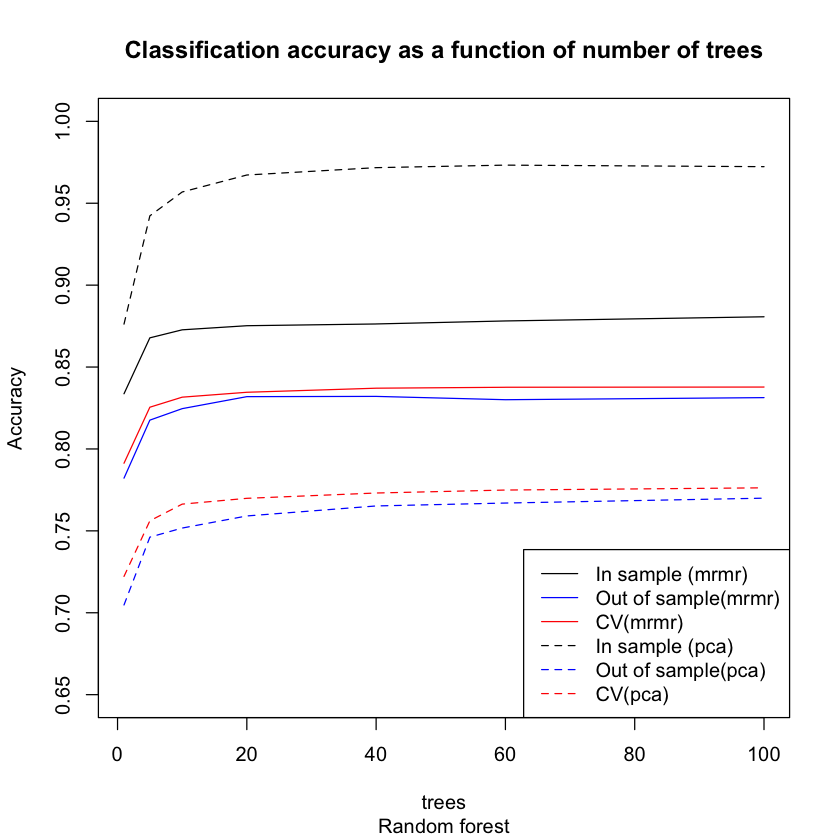

In [92]:
parameters <- list(1,5,10,20,40,60,100)
load("Files/CrossVal/CV_random_forest_mrmr.Rdata")
plot_CV_mrmr ("trees","Random forest",c(0.65,1))
load("Files/CrossVal/CV_random_forest_pca.Rdata")
plot_CV_pca()

The same behaviour as the previous model can be observed. Here the best number of tree is 100 which gives an accuracy on the cross validation of 83.78% (with mRMR). A stagnation of the gain of accuracy can be observed very quickly, pass 10 trees no significant gain of performance can be observed.

Here is the validation of the random forest model with 100 trees. 

In [93]:
rf_Validation <- function(nb_trees,data){
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)

    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=nb_trees,keep.forest=TRUE)
    print(model$test$confusion)
    accuracy <- (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    accuracy
}
rf_Validation(100,data_preproc_mrmr)

                        functional functional needs repair non functional
functional                    9116                     305            773
functional needs repair       1039                    6501            245
non functional                1747                     132           5245
                        class.error
functional                0.1057485
functional needs repair   0.1649326
non functional            0.2637563


[1] 0.8310384

## 2.3. Support Vector Machine

Here we will do a model based on Support Vector Machine. The svm function is used in order to create a model based on SVM. The SVM model is a supervised machine learning that classify binary classes. Since there are 3 classes of group status in the given dataset, the SVM model has to do 3 binary classifications. Then, it will majority vote for the dominant class among the 3. 

In [94]:
#Load training dataset preprocessed with smote and mRMR
load(file = "Files/Preprocessing/data_preprocMMR.Rdata")
load(file = "Files/Preprocessing/test_preprocMMR.Rdata")

### 2.3.1 Grid search with cross validation

2 important hyperparameters have to be set. We want to use the best parameter values to reach the highest accuracy as possible. To do so, preliminary tests were done in order to determine the range of the Gamma parameter and the Cost parameter.
The Gamma parameter seems to be more impactful than the Cost parameter. Once the preliminary tests are done and that suitable set of Cost and Gamma are determined, we implement a grid search combined with a k-fold cross validation for varying values of Cost $\in \{2^{10},2^{11}\}$ and  Gamma $\in [0.001,0.007]$. Note that the data are preprocessed with smote.

In [95]:
cross_Validation_InOut_Sample_SVM <- function(cost=1000, gamma=0.01, k=10, data_in) {
    data <- data_in
    accuracy_vec <- c()

    #Shuffle the dataset randomly
    data_idx <- sample(1:nrow(data))
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    
    #Split the dataset into k groups
    max <- ceiling(nrow(data)/k)
    splits <- split(data_idx, ceiling(seq_along(data_idx)/max))

    #For each unique group:
    for(i in 1:k){
        #Take the group as a hold out or test data set
        train_data <- data[-splits[[i]],]
        #Take the remaining groups as a training data set
        test_data <- data[splits[[i]],]
        
        #Fit a model on the training set and evaluate it on the test set
        model_svm <- svm(status_group ~ ., data=train_data, gamma=gamma, cost=cost)
        #Prediction on test set
        Y_hat <- predict(model_svm, test_data[, -target_variable])
        Y_target <- test_data[, target_variable]
       
        accuracy_vec[i] <- compute_Results(Y_target, Y_hat, paste(i,"fold"))
    }

    #Results of the cross validation
    print(paste("[INFO] - CV - Accuracy:",mean(accuracy_vec)))
    print(paste("[INFO] - CV - Mean misclassification rate:",1-mean(accuracy_vec)))
    #Results of in and out of sample
    accuracy <- inOut_Sample_Test_SVM(data,target_variable, data_idx, half_split, cost, gamma)
    
    return(list(in_sample=accuracy$in_sample,out_sample=accuracy$out_sample,cv=mean(accuracy_vec)))
}

In [96]:
inOut_Sample_Test_SVM <- function(data, target_variable, data_idx, half_split, cost, gamma) {
    #Split training-test for in/out of sample predictions
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    train_label <- data[data_idx[1:half_split], target_variable]
    test_label <- data[data_idx[(half_split+1):nrow(data)], target_variable]
    Y_target <- test_label

    #Model for in and out of sample
    model_single_out <- svm(status_group ~ ., data=train_data, gamma=gamma, cost=cost)

    #Prediction
    #In sample evaluation 
    Y_hat_single_out_in_sample  <- predict(model_single_out,train_data[,-target_variable])
    #Out of sample evaluation 
    Y_hat_single_out_out_sample <- predict(model_single_out,test_data[,-target_variable])

    accuracy_in_sample <- compute_Results(train_label,Y_hat_single_out_in_sample,"In sample")
    accuracy_out_sample <- compute_Results(Y_target, Y_hat_single_out_out_sample,"Out sample")
    
    return (list(in_sample=accuracy_in_sample,out_sample=accuracy_out_sample))
}

Note that the dataset used here is down-sampled due to the very long running time for a SVM model. As a result, the number of sample in the preprocessed data is divided by 10. This is only done for the purpose of demonstration as otherwise the running times would be quite long. To obtain the optimal results, uncomment the commented line in the code.

In [97]:
apply_CV_InOut_Comp_SVM <- function(costlist, gammalist, k, data_in) {
    #Downsampling
    data_idx <- sample(1:nrow(data_in))
    split <- floor(nrow(data_in)/10)
    #UNCOMMENT NEXT LINE FOR BEST RESULTS BUT LONGER RUNNING TIMES
    #split <- floor(nrow(data_in))
    data <- data_in[data_idx[1:split],]
    
    accuracy_in_sample_vec1 <- numeric()
    accuracy_out_sample_vec1 <- numeric()
    accuracy_cv_vec1 <- numeric()
    accuracy_in_sample_vec2 <- numeric()
    accuracy_out_sample_vec2 <- numeric()
    accuracy_cv_vec2 <- numeric()
    
    print(paste("[INFO] - Testing C=",costlist[1]))
    for(gamma in gammalist){
        print(paste("[INFO] - Testing gamma=",gamma))
        results <- cross_Validation_InOut_Sample_SVM(costlist[1], gamma, k, data)
        accuracy_in_sample_vec1 <- c(accuracy_in_sample_vec1,results$in_sample)
        accuracy_out_sample_vec1 <- c(accuracy_out_sample_vec1,results$out_sample)
        accuracy_cv_vec1 <- c(accuracy_cv_vec1,results$cv)
    }
    print(paste("[INFO] - Testing C=",costlist[2]))
    for(gamma in gammalist){
        print(paste("[INFO] - Testing gamma=",gamma))
        results <- cross_Validation_InOut_Sample_SVM(costlist[2], gamma, k, data)
        accuracy_in_sample_vec2 <- c(accuracy_in_sample_vec2,results$in_sample)
        accuracy_out_sample_vec2 <- c(accuracy_out_sample_vec2,results$out_sample)
        accuracy_cv_vec2 <- c(accuracy_cv_vec2,results$cv)
    }
    
    return (list(in_sample1=accuracy_in_sample_vec1,out_sample1=accuracy_out_sample_vec1,cv1=accuracy_cv_vec1,
                in_sample2=accuracy_in_sample_vec2,out_sample2=accuracy_out_sample_vec2,cv2=accuracy_cv_vec2))
}

The grid search has been executed on the preprocessed data with mRMR and also with PCA and stored in different files for each feature selection technique in order to load them without the running time which is very long with a SVM model. 
It is __recommended to not run__ this following cell due to a long running time.

In [98]:
k <- 10
gammalist <- seq(0.001,0.007, 0.002)
costlist <- c(2^{10}, 2^{11})
#UNCOMMENT THE FOLLOWING LINES TO APPLY CROSS VAL (LONG EXECUTION TIMES)
#accuracy_vec <- apply_CV_InOut_Comp_SVM(costlist, gammalist, k, data_preproc_mrmr)
#accuracy_vec <- apply_CV_InOut_Comp_SVM(costlist, gammalist, k, data_preproc_pca)

Experiments have been made upstream to save time.
Let's display the results obtained from the grid searches.

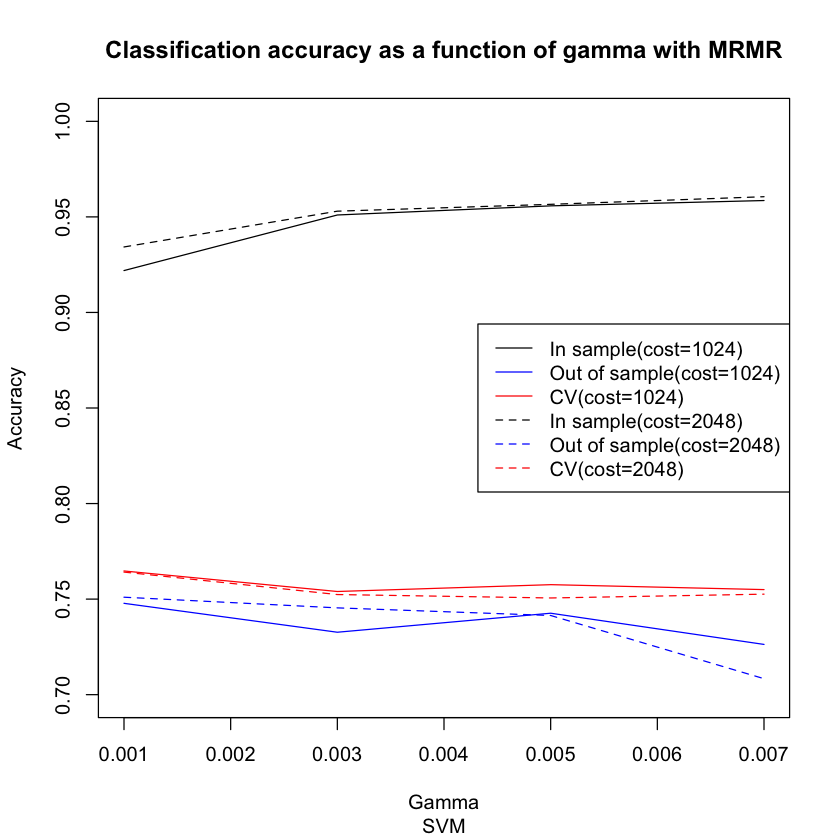

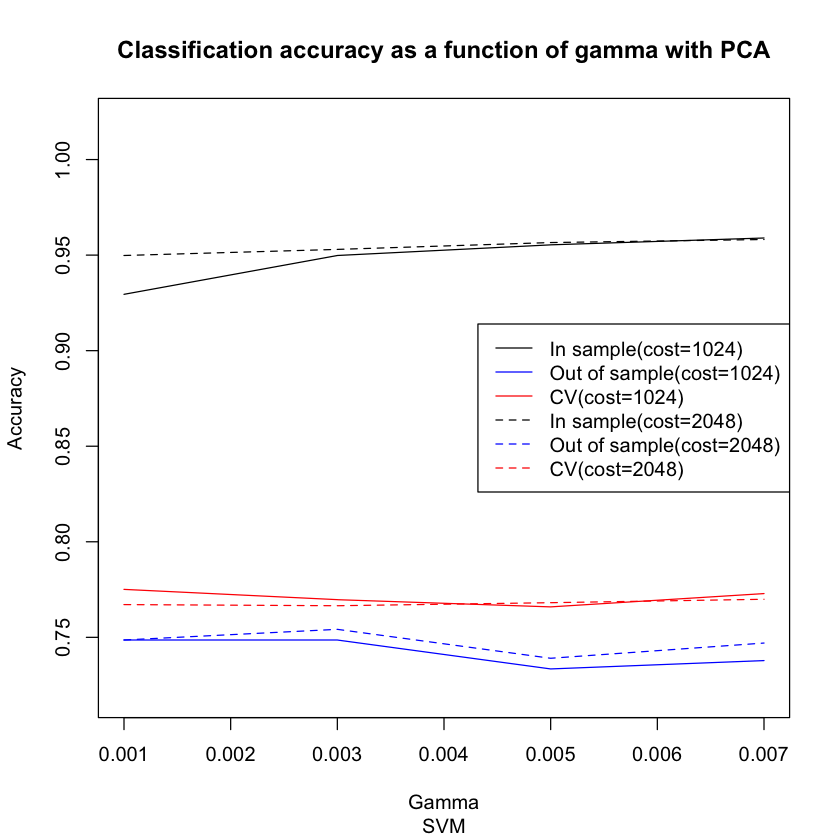

In [99]:
#Plot of MRMR
load("Files/CrossVal/CV_svm_mrmr.Rdata")
parameters <- list(0.001, 0.003, 0.005, 0.007)
plot(parameters,seq(0.7,1, 0.1),type="n",main="Classification accuracy as a function of gamma with MRMR",xlab="Gamma",ylab="Accuracy",sub="SVM")
lines(parameters,accuracy_vec$in_sample1)
lines(parameters,accuracy_vec$out_sample1,col="blue")
lines(parameters,accuracy_vec$cv1,col="red")
lines(parameters,accuracy_vec$in_sample2,lty=2)
lines(parameters,accuracy_vec$out_sample2,col="blue",lty=2)
lines(parameters,accuracy_vec$cv2,col="red",lty=2)
legend("right",legend=c("In sample(cost=1024)","Out of sample(cost=1024)","CV(cost=1024)",
                          "In sample(cost=2048)","Out of sample(cost=2048)","CV(cost=2048)"),col=c("black","blue","red"),lty=c(1,1,1,2,2,2))

#Plot of PCA
load("Files/CrossVal/CV_svm_pca.Rdata")
parameters <- list(0.001, 0.003, 0.005, 0.007)
plot(parameters,seq(0.72, 1.02, 0.1),type="n",main="Classification accuracy as a function of gamma with PCA",xlab="Gamma",ylab="Accuracy",sub="SVM")
lines(parameters,accuracy_vec$in_sample1)
lines(parameters,accuracy_vec$out_sample1,col="blue")
lines(parameters,accuracy_vec$cv1,col="red")
lines(parameters,accuracy_vec$in_sample2,lty=2)
lines(parameters,accuracy_vec$out_sample2,col="blue",lty=2)
lines(parameters,accuracy_vec$cv2,col="red",lty=2)
legend("right",legend=c("In sample(cost=1024)","Out of sample(cost=1024)","CV(cost=1024)",
                          "In sample(cost=2048)","Out of sample(cost=2048)","CV(cost=2048)"),col=c("black","blue","red"),lty=c(1,1,1,2,2,2))

We observe that when the mRMR is used on the preprocessed data, the cross validation provides a good accuracy in comparison to the in and out sample for both values of the cost parameter. Furthermore, it seems like the best gamma is 0.001 with a accuracy of 76.47% for a cost of 1024 and 76.41% for a cost of 2048. The cost parameter is not significant, we will thus choose to use the value 1024 as it will be less time consuming.

Then, we also observe that the cross validation on the preprocessed data using PCA generates better accuracies than the in and out sample. Moreover, the two values of the cost parameter are also equivalent here and the best gamma is 0.001 as for the MRMR. 

Let's compare the two cross validation of MRMR and PCA.

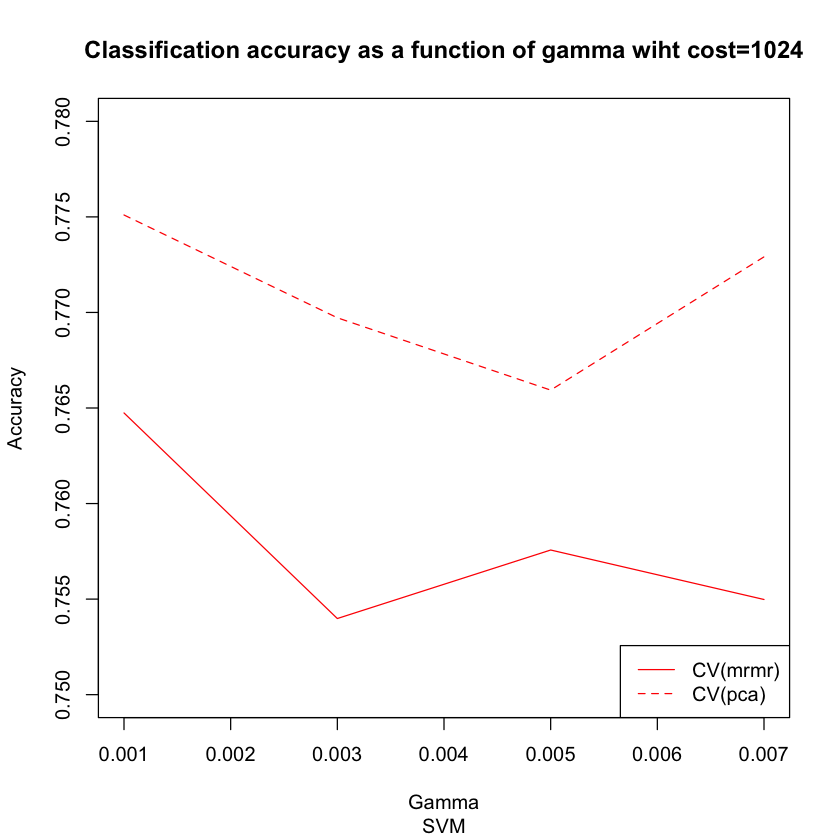

In [100]:
#Plot of PCA and MRMR
load("Files/CrossVal/CV_svm_mrmr.Rdata")
parameters <- list(0.001, 0.003, 0.005, 0.007)
plot(parameters,seq(0.75,0.78, 0.01),type="n",main="Classification accuracy as a function of gamma wiht cost=1024",xlab="Gamma",ylab="Accuracy",sub="SVM")
lines(parameters,accuracy_vec$cv1,col="red")
load("Files/CrossVal/CV_svm_pca.Rdata")
lines(parameters,accuracy_vec$cv1,col="red",lty=2)
legend("bottomright",legend=c("CV(mrmr)", "CV(pca)"),col=c("red"),lty=c(1,2))

We see that the cross validation with PCA is slightly better than mRMR with an accuracy of 77.51% for gamma=0.001 which is only a difference of less than 1% with the mRMR.

### 2.3.2 Bagging function

In [101]:
Bagging_SVM <- function(n_bagging_resamples=10, data) {
    #Downsampling
    data_idx <- sample(1:nrow(data))
    split <- floor(nrow(data)/3)
    #UNCOMMENT THE NEXT LINE TO GET THE BEST RESULTS
    #split <- floor(nrow(data))
    data <- data[data_idx[1:split],]
    
    #Split the resulting samples by two
    half_split <- floor(nrow(data)/2)
    target_variable <- ncol(data)
    accuracy_vec <- c()
    
    #Shuffle the dataset randomly
    data_idx <- sample(1:nrow(data))
    
    #Split shuffled dataset into training and test set
    train_data <- data[data_idx[1:half_split],]
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    n_train <- nrow(train_data)
    Y_hat_bagged <- array(0, c(nrow(test_data), 1))
    Y <- test_data[,target_variable]
    Y_pred_models <- numeric()
    accuracy_vec <- array(0, c(1, n_bagging_resamples))

    for (i in 1:n_bagging_resamples){
        #Resample data from the training set
        I_bag <- sample(seq(1, n_train), replace=TRUE)
        #I_bag <- sample(seq(1, 15*n_train), replace=TRUE)
        trainbis_data <- train_data[I_bag,]
        
        #Fit model
        model <- svm(status_group ~ ., data=trainbis_data, gamma=0.001, cost=2^{10})
        Y_pred <- predict(model, test_data[, -target_variable])
        Y_pred_models <- cbind(Y_pred_models, as.character(Y_pred))
        accuracy_vec[i] <- compute_Results(Y, Y_pred, paste(i,"th model"), verbose=F)
        #Store model
        if(i==1){
            models_bagged<-list(model)
        }else{
            models_bagged <- c(models_bagged,list(model))
        }
    }
    
    message("Majority vote of the classifiers")
    #Majority vote of the classifiers to make the prediction
    Y_hat_bagged <- apply(Y_pred_models, 1, function(x) names(which.max(table(x))))
    accuracy_bag <- compute_Results(Y, Y_hat_bagged, "bagged model")

    #Single model
    model_single_out <- svm(status_group ~ ., data=train_data, gamma=0.005, cost=2^{10})
    message("prediction of single model")
    Y_pred_single_out <- predict(model_single_out, test_data[, -target_variable])     
    accuracy_single_out <- compute_Results(Y, Y_pred_single_out, "single model")

    return(list(accuracy_bagged = accuracy_bag, accuracy_simple=accuracy_single_out, 
             bagging_accuracies = accuracy_vec,
             bag_models = models_bagged, single_model = model_single_out))
}

The technique of bagging is also used on the SVM model in order to confirm whether it will improve or not  the SVM model performance. As a demo, we will use the data preprocessed with PCA and the best parameters found above which is gamma=0.001 and cost=1024. Note that the following function was adapted (using downsampling to reduce execution times) . In order to get the best results, uncomment the indicated line in the previous function.

In [102]:
results <- Bagging_SVM(n_bagging_resamples=4, data_preproc_pca)

1

884051

2

884051

3

884051

4

884051

Majority vote of the classifiers



[1] "[INFO] - Confusion matrix bagged model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    4346                     427           1069
  functional needs repair         71                     117             61
  non functional                 389                     101           2259
[1] "[INFO] - Accuracy bagged model : 0.760407239819004"
[1] "[INFO] - Misclassification rate bagged model : 0.239592760180996"


prediction of single model



[1] "[INFO] - Confusion matrix single model :"
                         Y
Y_hat                     functional functional needs repair non functional
  functional                    4011                     360            892
  functional needs repair        190                     175            107
  non functional                 605                     110           2390
[1] "[INFO] - Accuracy single model : 0.743891402714932"
[1] "[INFO] - Misclassification rate single model : 0.256108597285068"


Bagging on SVM with a n_bagging_resamples = 100 has been done upstream on both feature selection techniques MRMR and PCA.
The following results are the accuracy resulting from those baggings.

In [103]:
#Feature selection mRMR
load(file="Files/SVM/SVM_bag100_mrmr.Rdata")
print(paste("Accuracy single model : ", acc_simple))
print(paste("Accuracy bagged model : ", acc_bag))

[1] "Accuracy single model :  0.764673157921444"
[1] "Accuracy bagged model :  0.765134782226843"


We remark that the bagging on the SVM with mRMR is slightly better than the single model.

In [104]:
#Feature selection PCA
load(file="Files/SVM/SVM_bag100_pca.Rdata")
print(paste("Accuracy single model : ", acc_simple))
print(paste("Accuracy bagged model : ", acc_bag))

[1] "Accuracy single model :  0.775143157843259"
[1] "Accuracy bagged model :  0.776782493355475"


A similar observation can be made here as for the mRMR feature selection. 
Finally, as stated above with the cross validation, the bagging with PCA is better than the bagging with mRMR.

### 2.3.3 Recapitulative Table
Let's wrap up the results of the models we have worked with so far in a recapitulative table in order to analyze and to compare them.

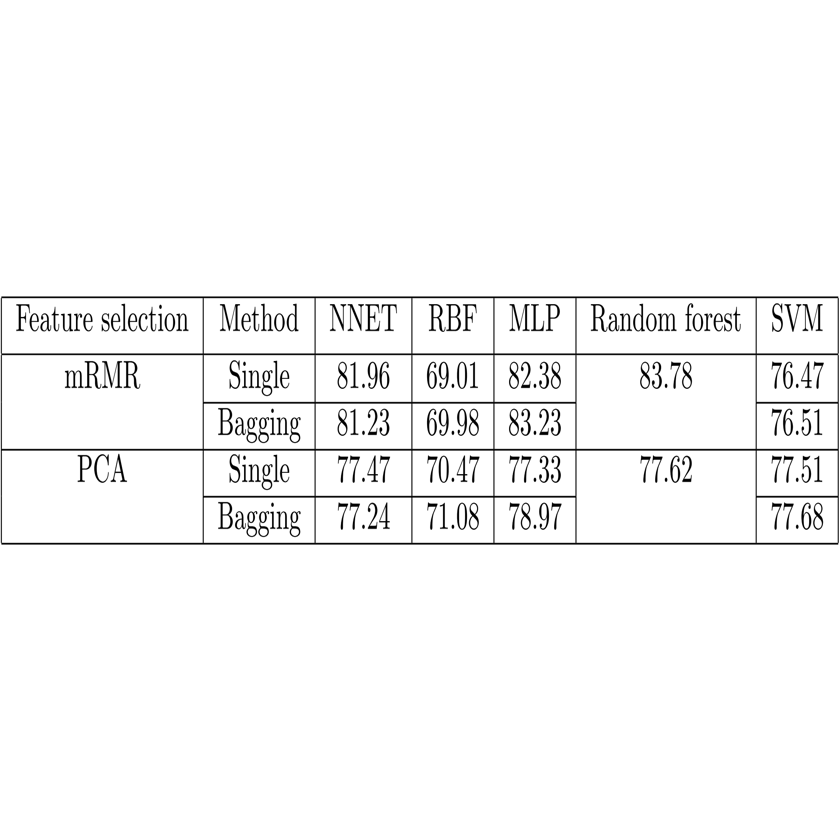

In [105]:
img <- readPNG("final_tab.PNG")
grid::grid.raster(img,width=1,height=0.3,interp=TRUE)

We observe that the bagging technique does improve the performance of the majority of the models except for the NNET model.
As a result, the Random Forest with the mRMR feature selection seems to provide the best accuracy metric among all the models presented in the table. Note that the Random Forest is already a bagging model, for that reason, we just have one results for each feature selection.

# 3. Alternative model : Gradient Boosting

The best model in the previous section being the Random Forest, a tree based model seemed to be the natural choice when picking an alternative model. Gradient boosting trees use an ensemble of weak prediction models (typically decision trees), and use gradient based methods in order to optimize the cost function (minimize it). This model typically outperforms Random Forest, so it seemed like a pertinent choice.

The $xgboost$ library will be used, as it is highly efficient and provides parallel tree boosting which considerably accelerates the process.

## 3.1. Hyperparameter selection / Embedded feature selection

Previously, the mRMR and PCA feature selection methods were used with a specific constant number of features. In this final model, an embedded feature selection method is applied, in order to determine which is the best number of features to take from mRMR and PCA in order to generate the best possible results. This feature selection method will also be combined with a hyperparameter selection.

The gradient boosting trees have 8 important hyperparamters to be set. Therefore, having a grid of parameters quickly leads to huge execution times. This is why we opted for a randomized approach. Hyperparameters are chosen in a semi-random way (randomly from a certain range of numbers). This allows to have quite a wide range of possible combinations (although not exchaustive of course). After several tests, the ranges of the parameters were constrained further, to obtain better quality results. The best number of features and the best hyperparameters will be kept for the next steps.

The pseudo code for the following function is :

```
for several numbers of features kept from mRMR or PCA:
    for i in 1:30:
        randomly select parameters
        apply 5-fold cross-validation with gradient boosting trees
        if a better solution is found:
            store the hyperparameters and the number of features
return the best hyperparameters and the best number of features

```

In [106]:
get_best_params <- function(train_data_init,ordered_features) {
#Runs a gradient boosting tree model using 5-fold cross-validation, by picking randomly 
#the hyperparameters and for different numbers of features (used for mRMR and PCA) as 
#an embedded feature selection procedure.

#param train_data_init : data on which the xgboost does cross-validation
#param ordered_features : feature indexes in their order of importance (following the order
#                         produced by mRMR or PCA)
#return : the best hyperparameters and the best number of features
                                                               
    #Initializing the values to be returned
    best_k <- 0
    best_param = list()
    best_seednumber = 1234
    best_loss = Inf
    best_loss_index = 0
    best_losses_per_k <- c()

    #Going through several number of selected features (k is the number of features to be taken,
    #i.e if k=30 with PCA, cross-validation will be done on the 30 first PCA features)
    for(k in c(40,200,20)) {
        #Training data
        train_data <- train_data_init[,ordered_features[1:k]]
        train_data <- cbind(train_data,subset(train_data_init,select=c(status_group)))

        target_variable <- ncol(train_data)
        labels <- as.matrix(as.numeric(train_data[,target_variable])) - 1
        
        #Stores the best loss (aka the minimal value of the error function) for each k
        best_k_loss <- Inf
        
        #Cross-validation is repeated 30 times
        for (iter in 1:30) {
            #Semi-random selection of hyperparameters
            param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = sample(10:20, 1),
                eta = runif(1, .001, .3),
                gamma = runif(1, 0.0, 0.2),
                subsample = runif(1, .6, .9),
                colsample_bytree = runif(1, .5, .8), 
                min_child_weight = sample(1:30, 1),
                max_delta_step = sample(7:12, 1)
            )
            seed.number <- sample.int(1000, 1)[[1]]
            set.seed(seed.number)

            #Gradient boosting tree with 500 rounds (at maximum, because the cross-validation 
            #is halted if after 10 successive rounds the loss has not decreased) and 5-fold cross-validation
            cv.nround <- 500
            cv.nfold <- 5

            #Running cross-validation on the training data with the parameters specified earlier
            bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label=labels,params = param, booster = "gbtree",
                                nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=10, maximize=FALSE)

            #Finding at which round the loss was minimal during the cross-validation
            min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
            min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
            message(min_loss_index)

            #If a new best solution is found, the hyperparameters and results are stored
            if (min_loss < best_loss) {
                best_loss <- min_loss
                best_loss_index <- min_loss_index
                best_seednumber <- seed.number
                best_param <- param
                best_k <- k
                message("BEST")
                message(best_param)
                message(best_k)
                message(best_seednumber)
            }
            
            #If a new best solution for this particular k is found, the corresponding value is stored
            if (min_loss < best_k_loss) {
                best_k_loss <- min_loss
            }
        }
        #Update the list of all best solutions for all k values
        best_losses_per_k <- c(best_losses_per_k,best_k_loss)
    }
    return(list(best_loss,best_loss_index,best_seednumber,best_param,best_k,best_losses_per_k))
}

In [107]:
evaluate_model <- function(df,params,seed,nround,print_importance = FALSE) {
#Evaluates a gradient boosting tree model on a given dataset. Performs the split
#into training set and test set, and uses the given parameters to establish a prediction
#and print out relevant information like the confusion matrix, the accuracy or even
#the importance of each feature.
#
#param df : dataset
#param params : parameters to be used in the gradient boosting tree
#param seed : random seed to be used (for reproducible results)
#param nround : number of rounds the gradient boosting tree should run for
#param print_importance : if TRUE, prints the most 10 important features
   
    #50-50 split
    data_idx <- sample(1:nrow(df))
    half_split <- floor(nrow(df)/2)
    train_data <- df[data_idx[1:half_split],]
    test_data <- df[data_idx[(half_split+1):nrow(df)],]
    
    training_labels <- as.matrix(as.numeric(train_data[,ncol(train_data)])) - 1
    test_labels <- factor(as.numeric(test_data[,ncol(train_data)]))
    
    set.seed(seed)
    
    #Train the gradient boosting model
    model <- xgboost(data = as.matrix(subset(train_data,select=-c(status_group))),label=training_labels, params=params, nrounds=nround,booster = "gbtree", nthread=6)
    
    #Predictions on the test set
    pred <- predict(model, as.matrix(subset(test_data,select=-c(status_group))),reshape = T) 
    predicted_labels <- factor(max.col(pred),levels=1:3)

    #Print the results
    cm <- caret::confusionMatrix(test_labels,predicted_labels)
    print(cm)
    print(cm$overall['Accuracy'])
    if(print_importance) {
        importanceRaw <- xgb.importance(feature_names = colnames(train_data), model = model, data = as.matrix(subset(train_data,select=-c(status_group))),label=training_labels)
        head(importanceRaw,10)
        xgb.plot.importance(importance_matrix = importanceRaw[1:10])
    }
}

To avoid recomputing the mRMR feature selection everytime, it is done once and will be reused throughout the next sections :

In [108]:
df_mrmr <- merge(X,Y)
df_mrmr <- preprocess_basic_training(df_mrmr)
df_no_status <- subset(df_mrmr,select=-c(status_group))
df_mrmr <- cbind(df_no_status,subset(df_mrmr,select=c(status_group)))
ordered_features <- apply_mrmr_numerical(df_mrmr)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 11974


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

### 3.1.1. mRMR with SMOTE


First of all the best hyperparameters are found for a data preprocessed using mRMR and SMOTE. This hyperparameter selection takes several hours to run and is __not recommended to execute__.

In [109]:
get_best_params_mrmr_smote <- function() {
#Calls the get_best_params function to get the best hyperparameters for a dataset
#that has been preprocessed with mRMR and SMOTE
    
    df <- create_smote_dataset(df_mrmr)
    res <- get_best_params(df,ordered_features)

    best_loss <- res[[1]]
    best_loss_index <- res[[2]]
    best_seednumber <- res[[3]]
    best_param <- res[[4]]
    best_k <- res[[5]]
    best_losses_per_k <- res[[6]]
}

The best hyperparameters are represented below, and a model is created based on these parameters. After evaluation on a test set to figure out the accuracy, the result is around 84.45%. This is by far the best accuracy we have computed throughout the project.

In [110]:
test_mrmr_smote_model <- function() {
    param <- list(objective = "multi:softprob",
                    eval_metric = "merror",
                    num_class = 3,
                    max_depth = 15,
                    eta = 0.165468964137603,
                    gamma = 0.101486052945256,
                    subsample = 0.841254485514946,
                    colsample_bytree = 0.748106639110483, 
                    min_child_weight = 1,
                    max_delta_step = 10
                )
    best_seed <- 25
    best_k <- 80
    nround <- 145

    df_train <- create_smote_dataset(cbind(df_mrmr[,ordered_features[1:best_k]],subset(df_mrmr,select=c(status_group))))

    evaluate_model(df_train,param,best_seed,nround)
}

### 3.1.2. mRMR without SMOTE

However, when publishing the predictions on DrivenData, we saw there was quite a gap between this accuracy and the one obtained on the competition. This is mainly due to the fact that SMOTE modifies the dataset _too much_, and that it does not really reflect the data on which the model is evaluated on DrivenData. We therefore decided to use mRMR without SMOTE. The same 2 steps are followed, and once again running the hyperparameter takes several hours and is __not recommended to run__.

In [111]:
get_best_params_mrmr_no_smote <- function() {
#Calls the get_best_params function to get the best hyperparameters for a dataset
#that has been preprocessed with mRMR

    res <- get_best_params(df_mrmr,ordered_features)

    best_loss <- res[[1]]
    best_loss_index <- res[[2]]
    best_seednumber <- res[[3]]
    best_param <- res[[4]]
    best_k <- res[[5]]
    best_losses_per_k <- res[[6]]
}

Once again, a model is created using the best hyperparameters and the accuracy is 79.81%. Notice that in the results, it is clear that the misclassification rate is higher for the class that is the least represented (*functional needs repair*). This was expected because of the lack of data balancing in this case. In particular, the sensitivity is very low for that class, meaning the number of true positives compared to the number of true positives and false negatives is very low.

In [112]:
test_mrmr_no_smote_model <- function() {
    param <- list(objective = "multi:softprob",
                    eval_metric = "merror",
                    num_class = 3,
                    max_depth = 17,
                    eta = 0.0755197018329054,
                    gamma = 0.0943593920674175,
                    subsample = 0.806684761145152,
                    colsample_bytree = 0.603914480283856, 
                    min_child_weight = 2,
                    max_delta_step = 12
                )
    best_seed <- 998
    best_k <- 150
    nround <- 100

    evaluate_model(cbind(df_mrmr[,ordered_features[1:best_k]],subset(df_mrmr,select=c(status_group))),param,best_seed,nround)
}


### 3.1.3. PCA

The same process is applied to preprocessing using PCA, the best hyperparameters are found, and the final result is an accuracy of 78.35%.

In [113]:
get_best_params_pca <- function() {
#Calls the get_best_params function to get the best hyperparameters for a dataset
#that has been preprocessed with mRMR
    df <- merge(X,Y)
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    X_pca <- pca(df)
    X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
    X_pca <- cbind(X_pca,subset(df,select = c(status_group)))

    res <- get_best_params(X_pca,1:ncol(X_pca))

    best_loss <- res[[1]]
    best_loss_index <- res[[2]]
    best_seednumber <- res[[3]]
    best_param <- res[[4]]
    best_k <- res[[5]]
    best_losses_per_k <- res[[6]]
}

In [114]:
test_pca_model <- function() {
    param <- list(objective = "multi:softprob",
                    eval_metric = "merror",
                    num_class = 3,
                    max_depth = 11,
                    eta = 0.128285527412547,
                    gamma = 0.0288312798831612,
                    subsample = 0.757424440677278,
                    colsample_bytree = 0.762188565917313, 
                    min_child_weight = 13,
                    max_delta_step = 7
                )

    best_k <- 75
    best_seed <- 734
    nround <- 75

    df <- merge(X,Y)
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    X_pca <- pca(df)
    X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
    X_pca <- cbind(X_pca,subset(df,select = c(status_group)))

    evaluate_model(cbind(X_pca[,1:best_k],subset(X_pca,select=c(status_group))),param,best_seed,nround)
}

In [115]:
test_gb_model <- function(preproc_type) {
#Evaluates a model with the optimal hyperparameters found by crossvalidation previously.
#param preproc_type : indicates on which data the model evaluation has to be done.
    if(preproc_type == "mrmr_smote") {
        test_mrmr_smote_model()
    }
    else if(preproc_type == "mrmr_no_smote") {
        test_mrmr_no_smote_model()
    }
    else if(preproc_type == "pca") {
        test_pca_model()
    }
}

To call a specific function to evaluate a Gradient Boosting Tree model with the optimal parameters, the following function has to be run, precising the preprocessing type that has to be tested (```mrmr_smote```, ```mrmr_no_smote```or ```pca```).

In [116]:
test_gb_model("pca")

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 11974


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1]	train-merror:0.225444 
[2]	train-merror:0.206214 
[3]	train-merror:0.195279 
[4]	train-merror:0.193319 
[5]	train-merror:0.189133 
[6]	train-merror:0.184684 
[7]	train-merror:0.181705 
[8]	train-merror:0.179141 
[9]	train-merror:0.176954 
[10]	train-merror:0.175220 
[11]	train-merror:0.173636 
[12]	train-merror:0.171072 
[13]	train-merror:0.168131 
[14]	train-merror:0.165906 
[15]	train-merror:0.164436 
[16]	train-merror:0.161118 
[17]	train-merror:0.159459 
[18]	train-merror:0.157875 
[19]	train-merror:0.156065 
[20]	train-merror:0.154406 
[21]	train-merror:0.152181 
[22]	train-merror:0.150635 
[23]	train-merror:0.148486 
[24]	train-merror:0.147619 
[25]	train-merror:0.147129 
[26]	train-merror:0.145507 
[27]	train-merror:0.144074 
[28]	train-merror:0.142868 
[29]	train-merror:0.141624 
[30]	train-merror:0.140153 
[31]	train-merror:0.139851 
[32]	train-merror:0.138946 
[33]	train-merror:0.138155 
[34]	train-merror:0.137250 
[35]	train-merror:0.135855 
[36]	train-merror:0.134573 
[

To sum up, the best accuracy is obtained with data using mRMR and SMOTE (but does not necessarily mean it will behave better on DrivenData as explained previously). The mRMR without SMOTE yields the second best result, and the PCA the worst result out of the 3. These observations are summarized below :

In [117]:
accuracies <- c(84.45,79.81,78.35)
preprocessing_methods <- c("mRMR + SMOTE","mRMR","PCA")
data.frame(method=preprocessing_methods,accuracy=accuracies)

method,accuracy
<chr>,<dbl>
mRMR + SMOTE,84.45
mRMR,79.81
PCA,78.35


## 3.2. Ensemble learning

The results obtained could be further improved by using ensemble learning, which is known to reduce the variance of the prediction without affecting its bias. Indeed, the predictions depend on a random seed, and we could maintain all hyperparameters constant and make the seed vary, to obtain a wide series of (hopefully) good quality solutions. A majority vote could be applied to this result in order to produce the final prediction. The main downside of this method is that the exdcution times are sometimes quite long as the model is trained multiple times.

The only hyperparameter that will be changed throughout the algorithm is the number of rounds; because the best solution does not always come after the same amount of rounds. Therefore 5-fold cross-validation is applied and the optimal numnber of rounds is found. A gradient boosting tree model is then trained with these parameters and a prediction is made for the labels of the test set. The predictions on the test set for each random seed are stored in the $solutions$ dataframe (each column corresponds to predictions using a certain seed).

The pseudo-code for the following algorithm is :

```
set the hyperparameters to the optimal hyperparameters identified previously
for i in 1:15:
    change the random seed
    apply 5-fold cross-validation with a gradient boosting tree in order to find the best number of rounds
    identify the number of rounds with minimal loss
    train a gradient boosting tree with the optimal hyperparameters
    predict the labels of the test set
    add the prediction to the solutions dataframe
```

In [118]:
ensemble_gradient_boost <- function(train_data,test_data,param,nb_it) { 
#Applies an ensemble of gradient boosting trees in order to predict labels of
#a test set. The hyperparameter settings are chosen according the the results of the
#previous algorithm. The number of rounds is dependant on the seed, and is therefore 
#chosen by cross-validation.
#
# param train_data : data on which the xgboost trains
# param test_data : data on which we have to predict the labels
# param nb_it : number of models that will be trained in the ensemble of models
# return : the ensemble of all predictions of all models used in the function

    #Dataframe with a single column, in which each column apart from the first one
    #will contain predictions of the test set labels.
    solutions <- data.frame(nb=1:nrow(test_data))

    target_variable <- ncol(train_data)

    labels_train <- as.numeric(train_data[,target_variable]) - 1

    #5-fold cross-validation with 500 rounds (at maximum, because the cross-validation 
    #is halted if after 10 successive rounds the loss has not decreased)
    cv.nround <- 500
    cv.nfold <- 5

    #Number of learners used in the ensemble of models
    for(i in 2:(nb_it+1)) {
        #Change the seed to have (possibly) a different outcome than at the previous iteration
        set.seed(i)
        
        #Apply cross-validation
        bstSparse <- xgb.cv(data = as.matrix(train_data[,-target_variable]),label = labels_train,params = param, booster = "gbtree",
                        nthread=6, nfold=cv.nfold, nrounds=cv.nround,verbose = T,early_stopping_rounds=10, maximize=FALSE)

        #Find the number of rounds for which the loss was minimal
        min_loss <-  min(bstSparse$evaluation_log$test_merror_mean)
        min_loss_index  <- which.min(bstSparse$evaluation_log$test_merror_mean)
        message(min_loss_index)

        #Train a model using the previously found hyperparameters and the best number of rounds
        md <- xgboost(data = as.matrix(train_data[,-target_variable]),label = labels_train,params=param, nrounds=min_loss_index, nthread=6)

        #Predict the labels of the test set
        pred <- predict(md, as.matrix(test_data),reshape = T)
        
        #The objective is softprob, which means we get as output the probaboilities of each class.
        #We therefore select the class with the maximal probability.
        pred <- factor(max.col(pred),levels=1:3)

        #Add the predictions to the dataframe containing the prediction of all learners
        solutions[,i]<-pred
    }
    return(solutions)
}

In [125]:
get_predictions <- function(solutions) {
#Converts the solutions returned by the ensemble learning procedure into correclty
#formatted predictions. A majority vote is applied for each sample in order to 
#yield a prediction.
#
# param solutions : dataframe containing the prediction of all the models of the
#                   ensemble of models
# return : the predictions obtained by majority vote
    
    #For each sample, count the number of votes for each class
    count_1 <- rowSums(subset(solutions,select=-(nb)) == 1)
    count_2 <- rowSums(subset(solutions,select=-(nb)) == 2)
    count_3 <- rowSums(subset(solutions,select=-(nb)) == 3)
    counts <- cbind(count_1,count_2,count_3)

    prediction <- c()
    #Keep the most represented class for each sample
    for(i in 1:nrow(solutions)) {
        prediction[i] <- which.max(counts[i,])
    }
    prediction <- as.data.frame(prediction)
    prediction$prediction <- as.factor(prediction$prediction)
    return(prediction)
}


### 3.2.1. Testing the accuracy of the ensemble of models

We now test if the presented ensemble of models actually yields better results, both with and without SMOTE. The previously obtained optimal parameters are kept in both cases. The run can be very long, especially if the number of evaluated models in the ensemble of models is big (large number of repetitions of the for loop in the function *ensemble_gradient_boost*. In order to still be able to show that the ensemble of models works, the size of the training set was considerably reduced (it was normally a 50-50 split). Therefore, in order to obtain the best results that will be presented, you can uncomment the explicitly mentioned lines, but the execution time will be quite long. 

#### 3.2.1.1. mRMR with SMOTE

The results when using a 50-50 split between training and testing datasets is around 85.05%, which is an improvement compared to the previously found accuracy of 84.45% without the ensemble of models. 

In [120]:
test_ensemble_mrmr_smote <- function(nb_it) {
    param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 15,
                eta = 0.165468964137603,
                gamma = 0.101486052945256,
                subsample = 0.841254485514946,
                colsample_bytree = 0.748106639110483, 
                min_child_weight = 1,
                max_delta_step = 10
            )

    best_k <- 80

    df <- create_smote_dataset(df_mrmr)

    data_idx <- sample(1:nrow(df))
    half_split <- floor(nrow(df)/8)

    #UNCOMMENT THE FOLLOWING LINE IN ORDER TO OBTAIN THE BEST RESULTS (LONG EXECUTION)
    #half_split <- floor(nrow(df)/2)

    train_data <- cbind(df[data_idx[1:half_split],ordered_features[1:best_k]],subset(df[data_idx[1:half_split],],select=c(status_group)))
    test_data <- df[data_idx[(half_split+1):nrow(df)],ordered_features[1:best_k]]

    solutions <- ensemble_gradient_boost(train_data,test_data,param,nb_it)
    predictions <- get_predictions(solutions)

    #Represent the results of the prediction on the test set in a confusion matrix
    caret::confusionMatrix(factor(as.numeric(df[data_idx[(half_split+1):nrow(df)],ncol(df)])),predictions$prediction)
}


#### 3.2.1.2. mRMR without SMOTE

We apply exactly the same measures as previously but without using SMOTE. Once again the *optimal* execution is very long, but can be done by uncommenting the indicated line.

Without using SMOTE, we obtain an accuracy of around 80.5% using the ensemble of models, which is a slight improvement over the 79.81% accuracy we had obtained without the ensemble learning.

In [121]:
test_ensemble_mrmr_no_smote <- function(nb_it) {
    param <- list(objective = "multi:softprob",
                    eval_metric = "merror",
                    num_class = 3,
                    max_depth = 17,
                    eta = 0.0755197018329054,
                    gamma = 0.0943593920674175,
                    subsample = 0.806684761145152,
                    colsample_bytree = 0.603914480283856, 
                    min_child_weight = 2,
                    max_delta_step = 12
                )

    best_k <- 150

    data_idx <- sample(1:nrow(df_mrmr))
    half_split <- floor(nrow(df_mrmr)/8)

    #UNCOMMENT THE FOLLOWING LINE IN ORDER TO OBTAIN THE BEST RESULTS (LONG EXECUTION)
    #half_split <- floor(nrow(df)/2)

    train_data <- cbind(df_mrmr[data_idx[1:half_split],ordered_features[1:best_k]],subset(df_mrmr[data_idx[1:half_split],],select=c(status_group)))
    test_data <- df_mrmr[data_idx[(half_split+1):nrow(df_mrmr)],ordered_features[1:best_k]]

    solutions <- ensemble_gradient_boost(train_data,test_data,param,nb_it)
    predictions <- get_predictions(solutions)

    #Represent the results of the prediction on the test set in a confusion matrix
    caret::confusionMatrix(factor(as.numeric(df_mrmr[data_idx[(half_split+1):nrow(df_mrmr)],ncol(df_mrmr)])),predictions$prediction)
}


#### 3.2.1.3. PCA

The same test is applied to PCA, and gives a result of 79.11%.

In [139]:
test_ensemble_pca <- function(nb_it) {
    param <- list(objective = "multi:softprob",
                    eval_metric = "merror",
                    num_class = 3,
                    max_depth = 11,
                    eta = 0.128285527412547,
                    gamma = 0.0288312798831612,
                    subsample = 0.757424440677278,
                    colsample_bytree = 0.762188565917313, 
                    min_child_weight = 13,
                    max_delta_step = 7
                )

    best_k <- 75

    df <- merge(X,Y)
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    X_pca <- pca(df)
    X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
    X_pca <- cbind(X_pca,subset(df,select = c(status_group)))

    data_idx <- sample(1:nrow(X_pca))
    half_split <- floor(nrow(X_pca)/6)

    #UNCOMMENT THE FOLLOWING LINE IN ORDER TO OBTAIN THE BEST RESULTS (LONG EXECUTION)
    #half_split <- floor(nrow(df)/2)

    train_data <- cbind(X_pca[data_idx[1:half_split],1:best_k],subset(X_pca[data_idx[1:half_split],],select=c(status_group)))
    test_data <- X_pca[data_idx[(half_split+1):nrow(X_pca)],1:best_k]

    solutions <- ensemble_gradient_boost(train_data,test_data,param,nb_it)
    predictions <- get_predictions(solutions)

    #Represent the results of the prediction on the test set in a confusion matrix
    caret::confusionMatrix(factor(as.numeric(X_pca[data_idx[(half_split+1):nrow(X_pca)],ncol(X_pca)])),predictions$prediction)
}


In [140]:
test_ensemble <- function(preproc_type,nb_it) {
#Evaluates an ensemble of models with the optimal hyperparameters found by crossvalidation previously.
#param preproc_type : indicates on which data the model evaluation has to be done.
#param nb_it : number of models that will be trained in the ensemble of models.
    if(preproc_type == "mrmr_smote") {
        test_ensemble_mrmr_smote(nb_it)
    }
    else if(preproc_type == "mrmr_no_smote") {
        test_ensemble_mrmr_no_smote(nb_it)
    }
    else if(preproc_type == "pca") {
        test_ensemble_pca(nb_it)
    }
}

To run the previously explained functions to assess the accuracy of the ensemble of models, the following instruction has to be executed, precising the preprocessing of the data (```mrmr_smote```, ```mrmr_no_smote```or ```pca```). The second parameter is the number of iterations the ensemble of models will perform. It is set to 3 by default because of the long running times, but better results are of course obtained when setting this parameter to higher values.

To obtain similar results to those in the table below, the second parameter should be set to 10, but this yields very long execution times.

In [141]:
test_ensemble("pca",3)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”


[1] 11974


Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1]	train-merror:0.238150+0.002091	test-merror:0.308482+0.008776 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 10 rounds.

[2]	train-merror:0.208117+0.002195	test-merror:0.287102+0.008864 
[3]	train-merror:0.197511+0.000192	test-merror:0.272283+0.010922 
[4]	train-merror:0.186962+0.001359	test-merror:0.270700+0.006458 
[5]	train-merror:0.180175+0.002181	test-merror:0.268098+0.004734 
[6]	train-merror:0.175651+0.000940	test-merror:0.265269+0.007505 
[7]	train-merror:0.171776+0.001605	test-merror:0.261762+0.009071 
[8]	train-merror:0.168213+0.001865	test-merror:0.260179+0.008515 
[9]	train-merror:0.164706+0.002715	test-merror:0.258935+0.006856 
[10]	train-merror:0.161227+0.002719	test-merror:0.259500+0.006886 
[11]	train-merror:0.157975+0.002633	test-merror:0.260065+0.008963 
[12]	train-merror:0.155345+0.003083	test-merror:0.258595+0.005697 
[13]	train-merror:0.151867+0.002851	test-merror:0.257916+0.006917 
[1

28



[1]	train-merror:0.227941 
[2]	train-merror:0.204864 
[3]	train-merror:0.195023 
[4]	train-merror:0.188801 
[5]	train-merror:0.181674 
[6]	train-merror:0.176810 
[7]	train-merror:0.169796 
[8]	train-merror:0.165724 
[9]	train-merror:0.164140 
[10]	train-merror:0.162557 
[11]	train-merror:0.159842 
[12]	train-merror:0.156674 
[13]	train-merror:0.154299 
[14]	train-merror:0.149548 
[15]	train-merror:0.146946 
[16]	train-merror:0.144231 
[17]	train-merror:0.142986 
[18]	train-merror:0.140385 
[19]	train-merror:0.137557 
[20]	train-merror:0.134729 
[21]	train-merror:0.133145 
[22]	train-merror:0.129751 
[23]	train-merror:0.127489 
[24]	train-merror:0.124095 
[25]	train-merror:0.124434 
[26]	train-merror:0.122511 
[27]	train-merror:0.120928 
[28]	train-merror:0.119118 
[1]	train-merror:0.239819+0.004280	test-merror:0.317307+0.006602 
Multiple eval metrics are present. Will use test_merror for early stopping.
Will train until test_merror hasn't improved in 10 rounds.

[2]	train-merror:0.2078

35



[1]	train-merror:0.242760 
[2]	train-merror:0.206109 
[3]	train-merror:0.197511 
[4]	train-merror:0.187217 
[5]	train-merror:0.180769 
[6]	train-merror:0.173077 
[7]	train-merror:0.170814 
[8]	train-merror:0.165837 
[9]	train-merror:0.163122 
[10]	train-merror:0.158824 
[11]	train-merror:0.155204 
[12]	train-merror:0.153620 
[13]	train-merror:0.149548 
[14]	train-merror:0.147624 
[15]	train-merror:0.145475 
[16]	train-merror:0.142873 
[17]	train-merror:0.141855 
[18]	train-merror:0.139593 
[19]	train-merror:0.137783 
[20]	train-merror:0.135860 
[21]	train-merror:0.135181 
[22]	train-merror:0.131787 
[23]	train-merror:0.129525 
[24]	train-merror:0.127149 
[25]	train-merror:0.124887 
[26]	train-merror:0.122398 
[27]	train-merror:0.120928 
[28]	train-merror:0.117647 
[29]	train-merror:0.117081 
[30]	train-merror:0.115385 
[31]	train-merror:0.115724 
[32]	train-merror:0.113348 
[33]	train-merror:0.112896 
[34]	train-merror:0.110973 
[35]	train-merror:0.109955 
[1]	train-merror:0.237161+0.0

33



[1]	train-merror:0.228733 
[2]	train-merror:0.207353 
[3]	train-merror:0.193100 
[4]	train-merror:0.182127 
[5]	train-merror:0.179072 
[6]	train-merror:0.174548 
[7]	train-merror:0.171267 
[8]	train-merror:0.167081 
[9]	train-merror:0.164593 
[10]	train-merror:0.161765 
[11]	train-merror:0.158597 
[12]	train-merror:0.154525 
[13]	train-merror:0.150566 
[14]	train-merror:0.148869 
[15]	train-merror:0.145249 
[16]	train-merror:0.142986 
[17]	train-merror:0.140724 
[18]	train-merror:0.138801 
[19]	train-merror:0.137330 
[20]	train-merror:0.135407 
[21]	train-merror:0.132579 
[22]	train-merror:0.131335 
[23]	train-merror:0.129299 
[24]	train-merror:0.127715 
[25]	train-merror:0.126471 
[26]	train-merror:0.125000 
[27]	train-merror:0.123416 
[28]	train-merror:0.121041 
[29]	train-merror:0.118778 
[30]	train-merror:0.117195 
[31]	train-merror:0.116855 
[32]	train-merror:0.115045 
[33]	train-merror:0.113009 


Confusion Matrix and Statistics

          Reference
Prediction     1     2     3
         1 21042   381  2628
         2  1841   659   711
         3  4864   140 11936

Overall Statistics
                                        
               Accuracy : 0.761         
                 95% CI : (0.757, 0.765)
    No Information Rate : 0.6277        
    P-Value [Acc > NIR] : < 2.2e-16     
                                        
                  Kappa : 0.5439        
                                        
 Mcnemar's Test P-Value : < 2.2e-16     

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            0.7584  0.55847   0.7814
Specificity            0.8171  0.94068   0.8270
Pos Pred Value         0.8749  0.20523   0.7046
Neg Pred Value         0.6673  0.98729   0.8775
Prevalence             0.6277  0.02670   0.3456
Detection Rate         0.4760  0.01491   0.2700
Detection Prevalence   0.5441  0.07264   0.3832
Balanced Accuracy      0.7877  0.74

For all studied proprocessing methods, the ensemble of models always improves the accuracy of the prediction (typically by 0.6 to 0.8% compared to the single model). The best result so far is 85.05% obtained with mRMR and SMOTE. Note that the results presented below were obtained when setting the number of iterations to values much higher than 3 (typically 15), but this leads to extremely long execution times.

In [127]:
accuracies_single <- c(84.45,79.81,78.35)
accuracies_ensemble <- c(85.05,80.5,79.11)
preprocessing_methods <- c("mRMR + SMOTE","mRMR","PCA")
data.frame(method=preprocessing_methods,"single model accuracy"=accuracies,"ensemble of models accuracy"=accuracies_ensemble,"improvement"=accuracies_ensemble-accuracies_single)


method,single.model.accuracy,ensemble.of.models.accuracy,improvement
<chr>,<dbl>,<dbl>,<dbl>
mRMR + SMOTE,84.45,85.05,0.60
mRMR,79.81,80.50,0.69
PCA,78.35,79.11,0.76


### 3.2.2 Applying the ensemble of models to the DrivenData dataset

Now, we finally try to predict the accuracy of our model on the DrivenData dataset. This is done once by using the SMOTE data balancing and once without SMOTE. Bare in mind that SMOTE does affect the data itself, and that it may be less representative of the *pure* data contained in the DrivenData dataset. This is why both methods were tested.

The predictions have to be transformed into the appropriate strings in order to satisfy the submission conditions imposed by DrivenData, and the *id* of the samples has to be present. The following function is used in order to submit a prediction and write it to the ```submission.csv``` file.

In [128]:
submit_results <- function(prediction) {
    pred <- ifelse(prediction$prediction == 1,"functional",ifelse(prediction$prediction == 2, "functional needs repair", "non functional"))
    res <- cbind("id"=eval_data$id,"status_group"=as.character(pred))
    write.csv(res,"submission.csv",row.names=FALSE)
}

Note that for all the preprocessing methods, the sumbissions were made using an ensemble of 10 models, which takes an extremely long time to run. We therefore __do not recommend to run the following functions__. This allows to have a minimal variance, and we would expect the results to be even better if we submitted results with more than 10 models.

#### 3.2.2.1 mRMR with SMOTE

In [129]:
submit_mrmr_smote <- function() {
    param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 15,
                eta = 0.165468964137603,
                gamma = 0.101486052945256,
                subsample = 0.841254485514946,
                colsample_bytree = 0.748106639110483, 
                min_child_weight = 1,
                max_delta_step = 10
            )

    df <- cbind(df_mrmr[,ordered_features[1:80]],subset(df_mrmr,select=c(status_group)))
    df <- create_smote_dataset(df)
    df_no_status <- subset(df,select=-c(status_group))
    df_no_status <- df_no_status[,order(names(df_no_status))]
    df <- cbind(df_no_status,subset(df,select=c(status_group)))

    write(colnames(subset(df,select=-c(status_group))),"features.txt")

    train_data <- df
    test_data <- preprocess_test(eval_data,FALSE)

    head(train_data)
    head(test_data)

    solutions <- ensemble_gradient_boost(train_data,test_data,param,15)
    prediction <- get_predictions(solutions)
    submit_results(prediction)
}

#### 3.2.2.2. mRMR without SMOTE

In [130]:
submit_mrmr_no_smote <- function() {
    param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 17,
                eta = 0.0755197018329054,
                gamma = 0.0943593920674175,
                subsample = 0.806684761145152,
                colsample_bytree = 0.603914480283856, 
                min_child_weight = 2,
                max_delta_step = 12
            )

    df <- cbind(df_mrmr[,ordered_features[1:150]],subset(df_mrmr,select=c(status_group)))
    df <- df[,order(names(df))]
    df_no_status <- subset(df,select=-c(status_group))
    df_no_status <- df_no_status[,order(names(df_no_status))]
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    write(colnames(subset(df,select=-c(status_group))),"features.txt")

    train_data <- df
    test_data <- preprocess_test(eval_data,FALSE)

    solutions <- ensemble_gradient_boost(train_data,test_data,param,15)
    prediction <- get_predictions(solutions)
    submit_results(prediction)
}

#### 3.2.2.3. PCA

In [131]:
submit_pca <- function() {
    param <- list(objective = "multi:softprob",
                eval_metric = "merror",
                num_class = 3,
                max_depth = 11,
                eta = 0.128285527412547,
                gamma = 0.0288312798831612,
                subsample = 0.757424440677278,
                colsample_bytree = 0.762188565917313, 
                min_child_weight = 13,
                max_delta_step = 7
            )

    best_k <- 75

    df <- merge(X,Y)
    df <- preprocess_basic_training(df)
    df_no_status <- subset(df,select=-c(status_group))
    df <- cbind(df_no_status,subset(df,select=c(status_group)))
    X_pca <- pca(df)
    save(X_pca, file = "Files/Preprocessing/X_pca.Rdata")
    X_pca <- predict(X_pca,newdata=subset(df,select=-c(status_group)))
    X_pca <- cbind(X_pca[,1:best_k],subset(df,select = c(status_group)))
    X_pca <- X_pca[,order(names(X_pca))]
    write(colnames(subset(df,select=-c(status_group))),"features.txt")

    train_data <- X_pca
    test_data <- preprocess_test(eval_data,FALSE)
    load(file = "Files/Preprocessing/X_pca.Rdata")
    df_no_status <- pca_select(test_data,X_pca,best_k)
    test_data <- df_no_status[,order(colnames(df_no_status))]

    head(train_data)
    head(test_data)

    solutions <- ensemble_gradient_boost(train_data,test_data,param,15)
    prediction <- get_predictions(solutions)
    submit_results(prediction)
}

#### 3.2.2.4. Results

In [132]:
accuracies <- c(76.82,78.54,78.47)
preprocessing_methods <- c("mRMR + SMOTE","mRMR","PCA")
data.frame(method=preprocessing_methods,"resulting accuracy"=accuracies)

method,resulting.accuracy
<chr>,<dbl>
mRMR + SMOTE,76.82
mRMR,78.54
PCA,78.47


The best result on DrivenData comes from the data preprocessed with mRMR without SMOTE. This is probably due to the fact that the modifications made by SMOTE on the dataset are actually too important and too far from the original data, as we had thought might happen. This justifies why we tried different preprocessing techniques.

# Conclusions

 In conclusion, the tree-based models seem to yield the best results in this particular problem, and the best result that was obtained was with a Gradient Boosting Tree using embedded feature selection, hyperparameter selection and ensemble learning. Concerning the preprocessing, it seems that using SMOTE did not really help out in this project, as the created data was too different from the original one (and therefore the one on which the DrivenData submission was made). Thankfully, we had thought of this in advance and had implemented mRMR and PCA that could work well without SMOTE.
 
Although the obtained results seem acceptable, there are a few things that could have been tried out and implemented as well:
- using categorical variables for Random Forest
- make a more detailed hyperparameter selection for the Gradient Boosting Trees
- make more predictions in the Ensemble Learning using Gradient Boosting Trees
- combine multiple models of different nature in the Ensemble Learning
- look at the importance of each feature after running the Gradient Boosting Tree and keep only the most important features to reduce noice and accelerate the computations